<a href="https://colab.research.google.com/github/Pathway2008/income/blob/main/income_voting_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
한 사람에 관련된 다양한 사회적, 경제적 정보
ID : 학습 데이터 고유 ID
Age
Gender
Education_Status
Employment_Status
Working_Week (Yearly)
Industry_Status
Occupation_Status
Race
Hispanic_Origin
Martial_Status
Household_Status
Household_summary
Citizenship
Birth_Country
Birth_Country (Father)
Birth_Country (Mother)
Tax_Status
Gains
Losses
Divdends
Incom_Status
Income : 예측 목표, 1시간 단위의 소득을 예측
'''

In [1]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/income/train.csv')
test = pd.read_csv('/content/drive/MyDrive/income/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/income/sample_submission.csv')

In [5]:
import warnings
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
warnings.filterwarnings('ignore')
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

In [3]:
train.head()

ID  Age Gender                Education_Status Employment_Status  \
0  TRAIN_00000   63      M                    Middle (7-8)         Full-Time   
1  TRAIN_00001   37      M  Associates degree (Vocational)         Full-Time   
2  TRAIN_00002   58      F                   High graduate         Full-Time   
3  TRAIN_00003   44      M                   High graduate         Full-Time   
4  TRAIN_00004   37      F                   High graduate         Full-Time   

   Working_Week (Yearly)              Industry_Status  \
0                      4              Social Services   
1                     52                Entertainment   
2                     52  Manufacturing (Non-durable)   
3                     52                       Retail   
4                     52                       Retail   

                  Occupation_Status   Race Hispanic_Origin  ... Citizenship  \
0                          Services  White       All other  ...      Native   
1                          Services  White       All other  ...      Native   
2  Admin Support (include Clerical)  Black       All other  ...      Native   
3             Technicians & Support  White       All other  ...      Native   
4                             Sales  White       All other  ...      Native   

  Birth_Country Birth_Country (Father) Birth_Country (Mother)  \
0            US                     US                     US   
1            US                     US                     US   
2            US                     US                     US   
3            US                     US                     US   
4            US                     US                     US   

                                    Tax_Status Gains Losses Dividends  \
0                                     Nonfiler     0      0         0   
1                                       Single     0      0         0   
2  Married Filling Jointly both under 65 (MFJ)  3411      0         0   
3                                       Single     0      0         0   
4                      Head of Household (HOH)     0      0         0   

   Income_Status  Income  
0        Unknown     425  
1   Under Median       0  
2   Under Median     860  
3   Under Median     850  
4        Unknown     570  

[5 rows x 23 columns]

In [125]:
train.drop(['ID'],axis=1,inplace=True)
test.drop(['ID'],axis=1,inplace=True)

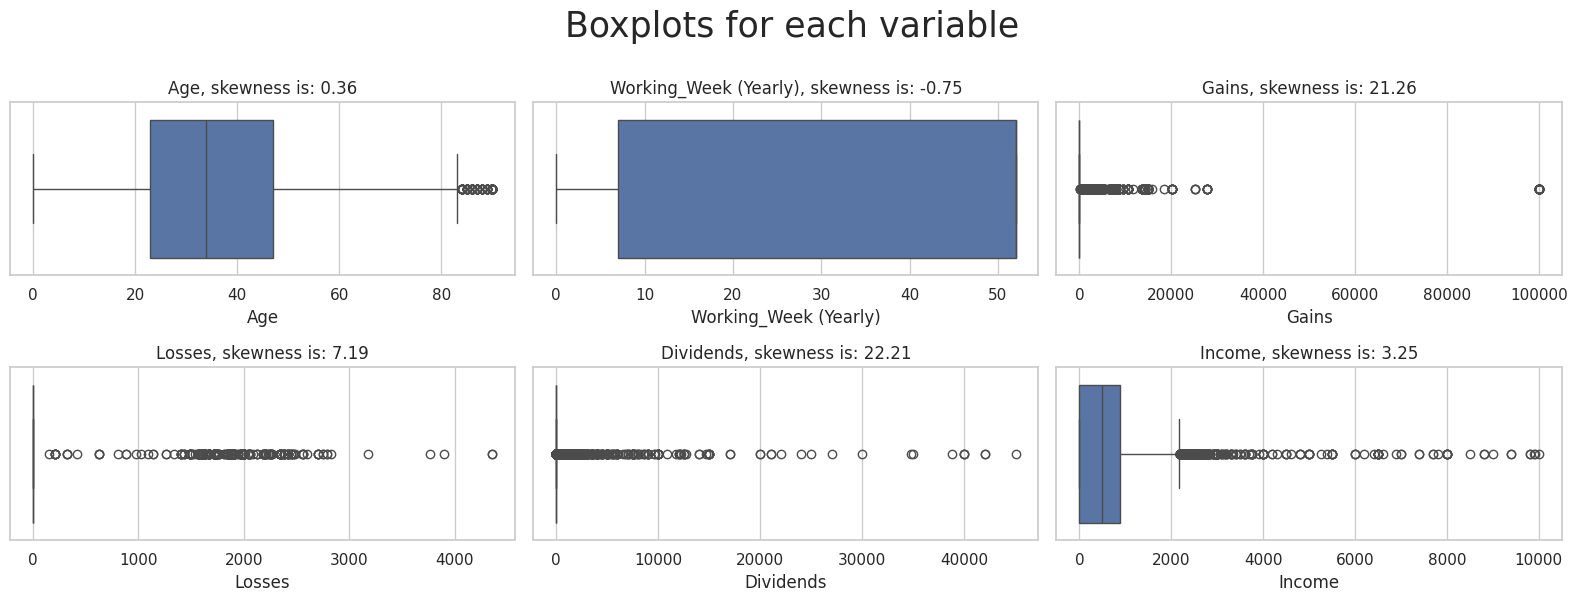

In [113]:
numeric_columns = train.select_dtypes(include='number')

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,3 * rows))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=train, columns_list=numeric_columns, rows=2, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

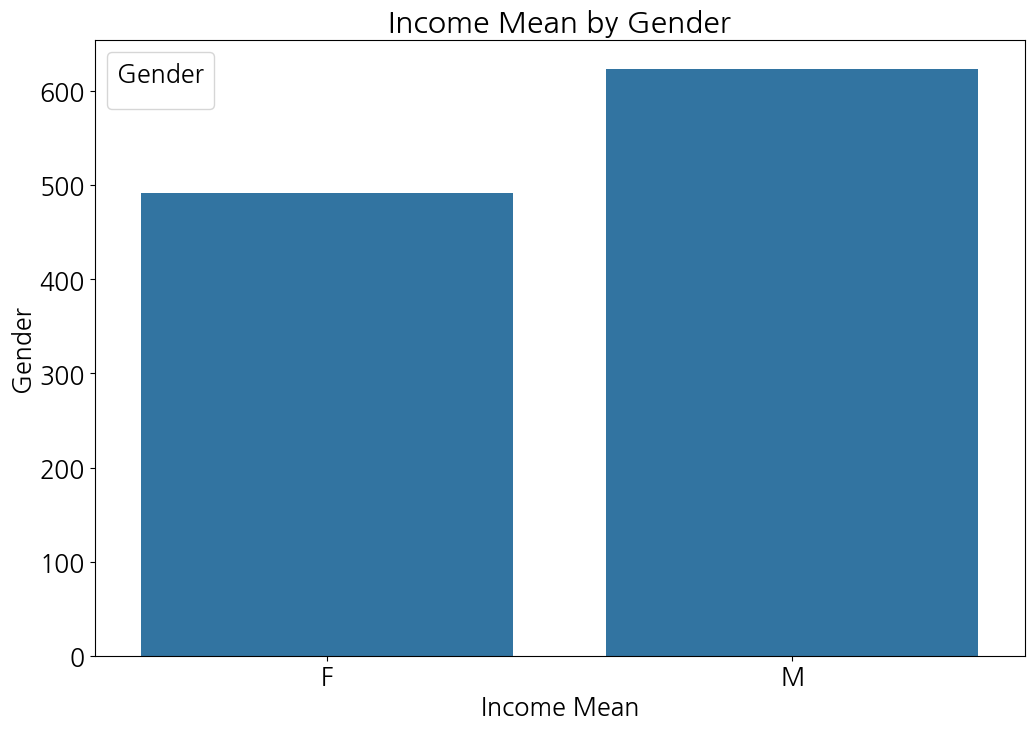

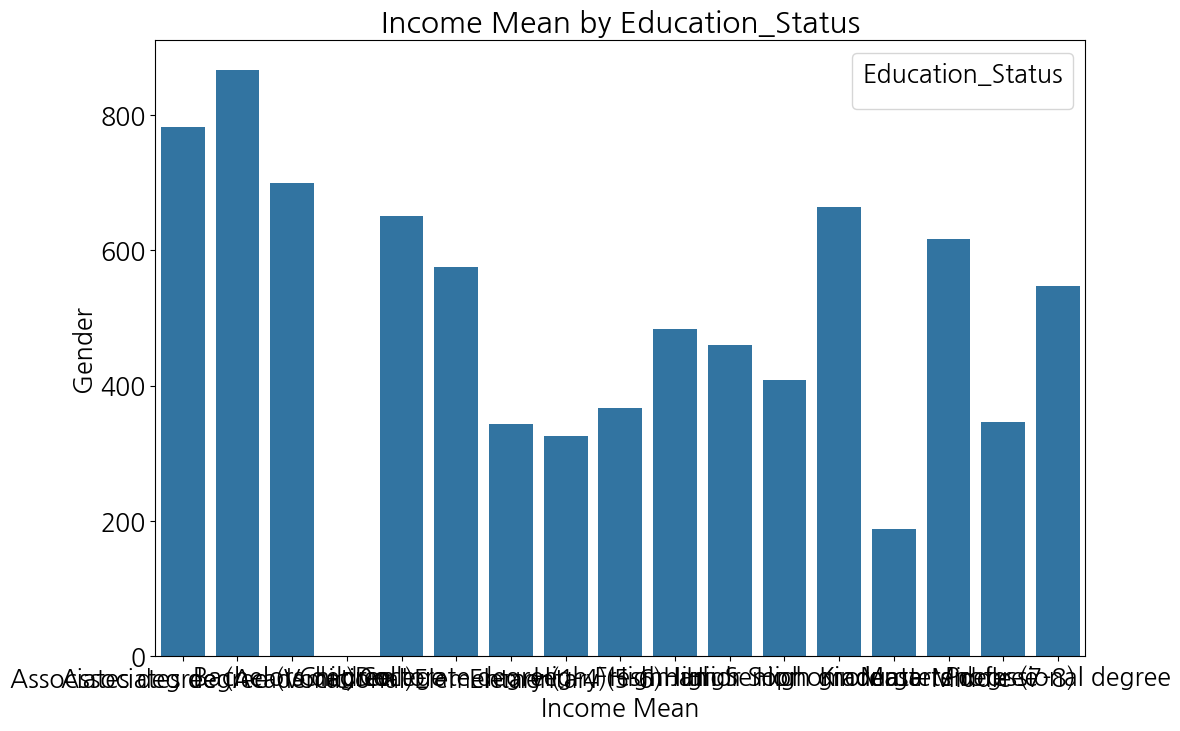

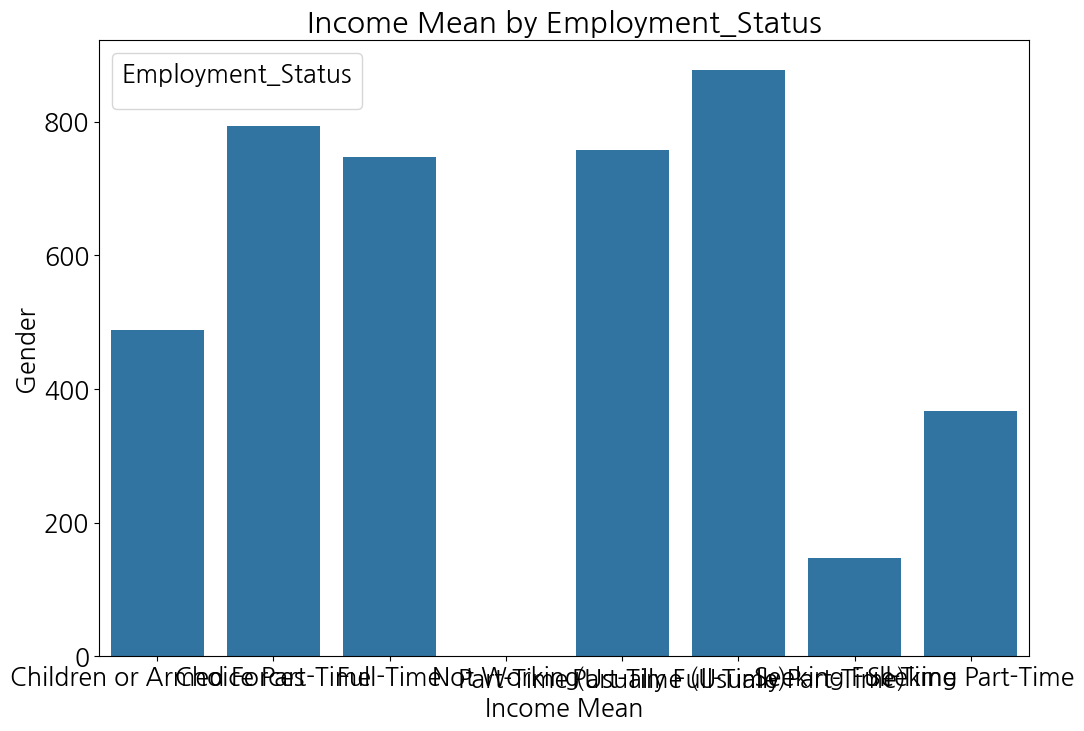

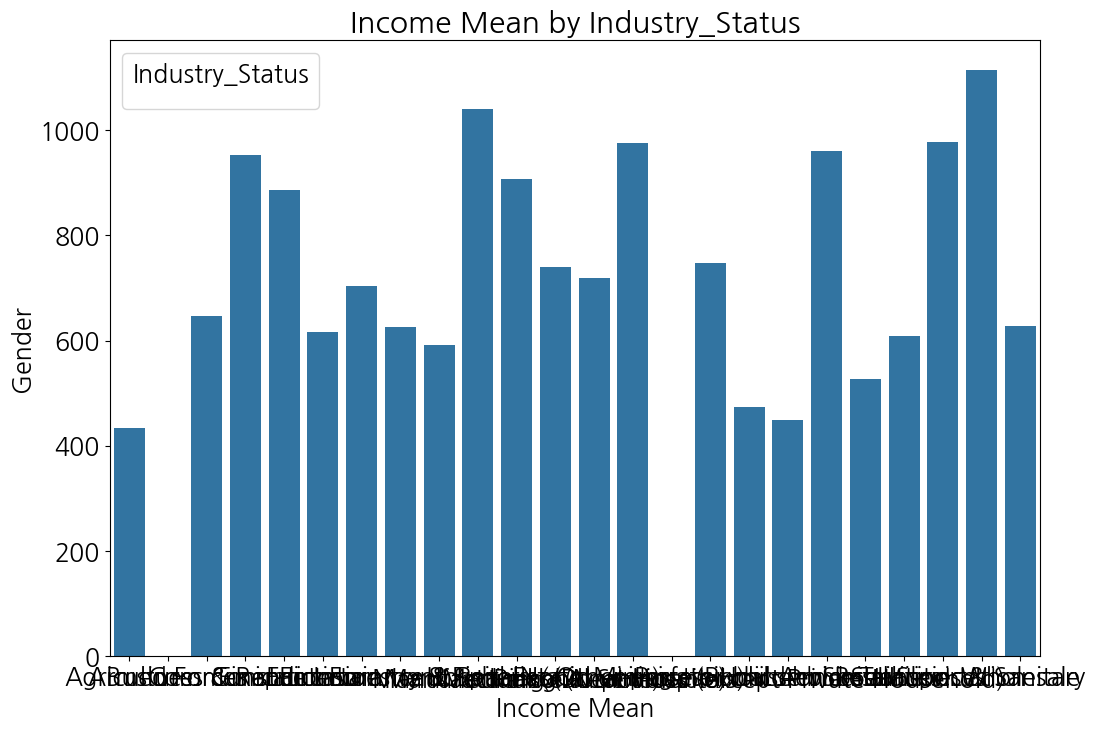

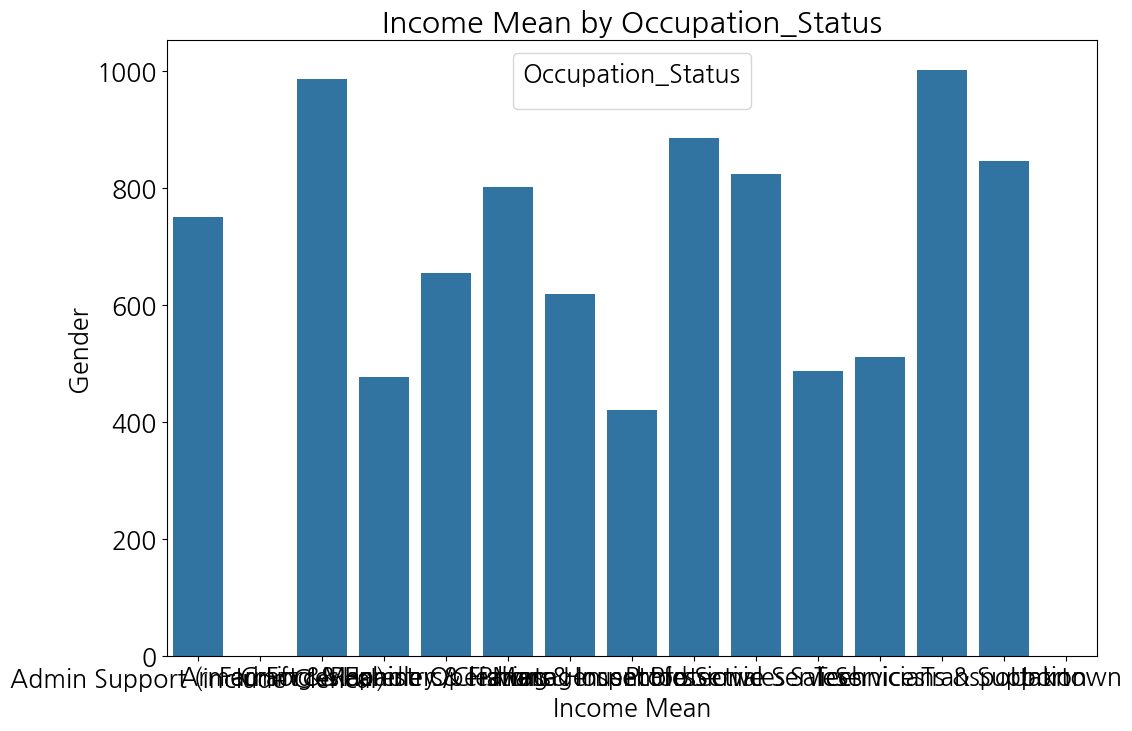

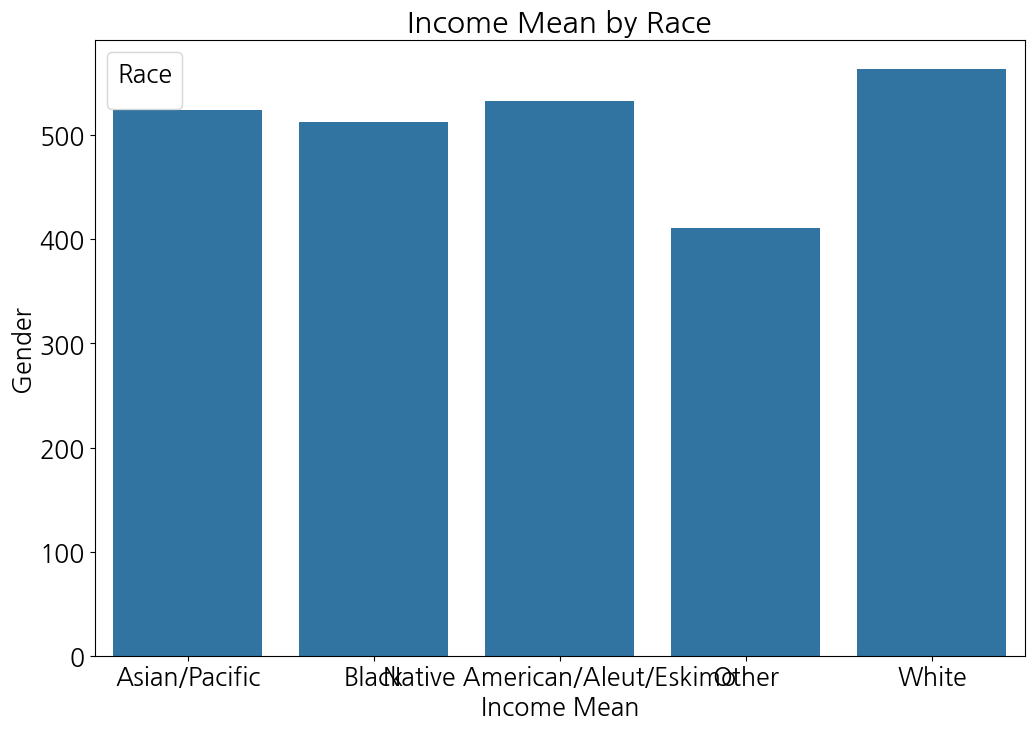

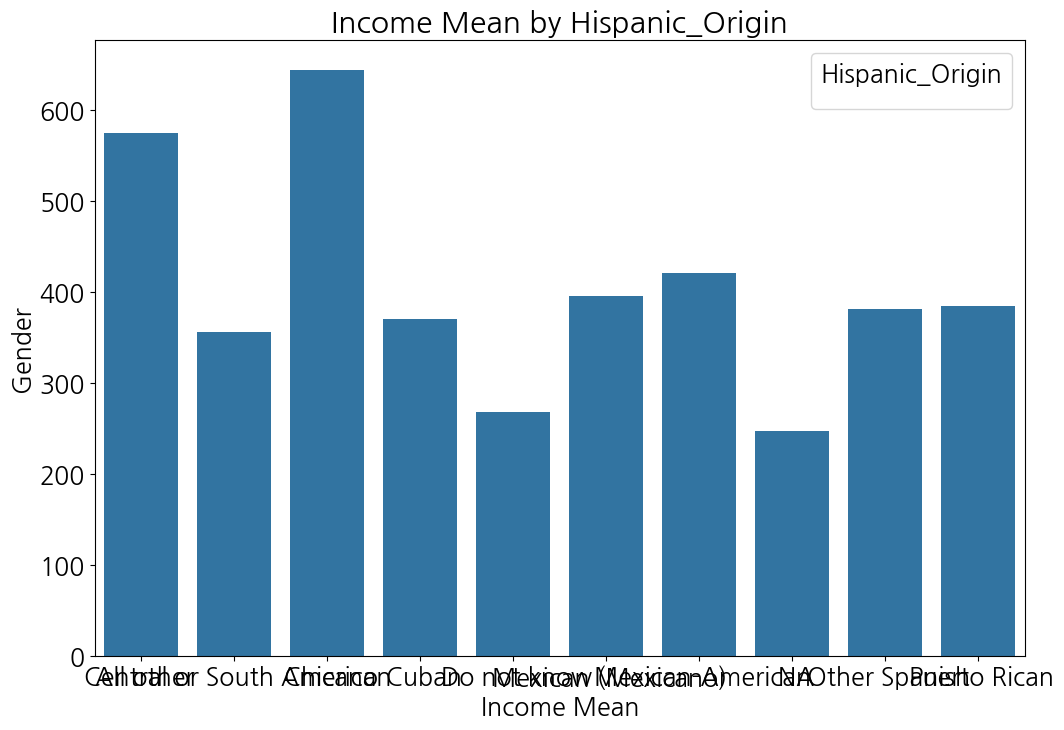

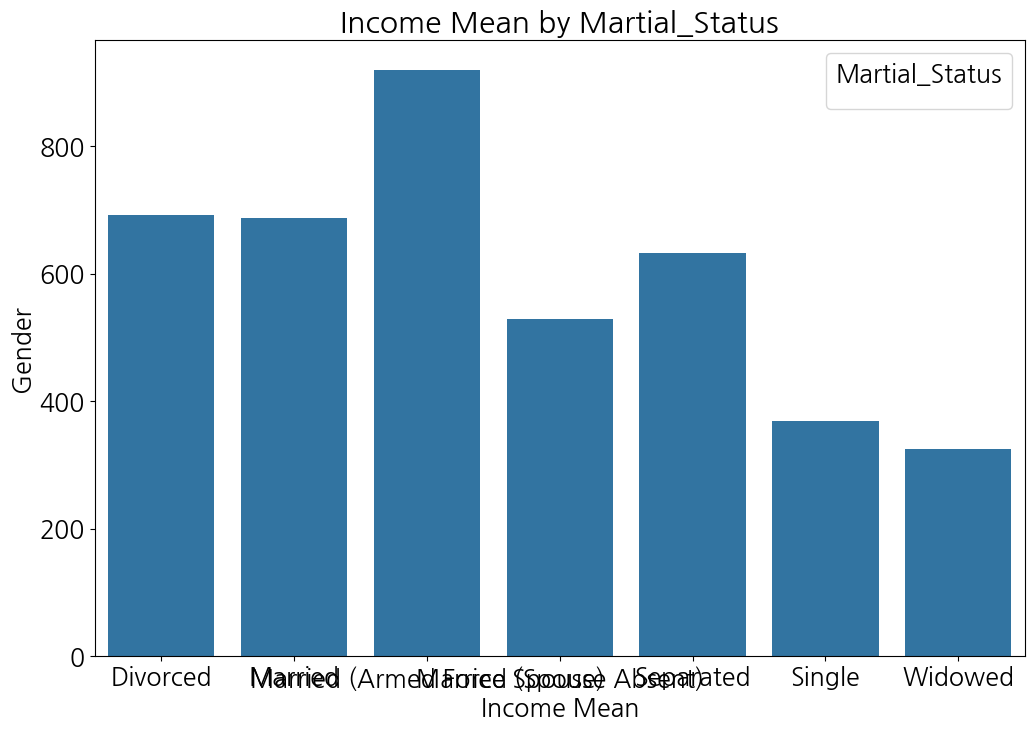

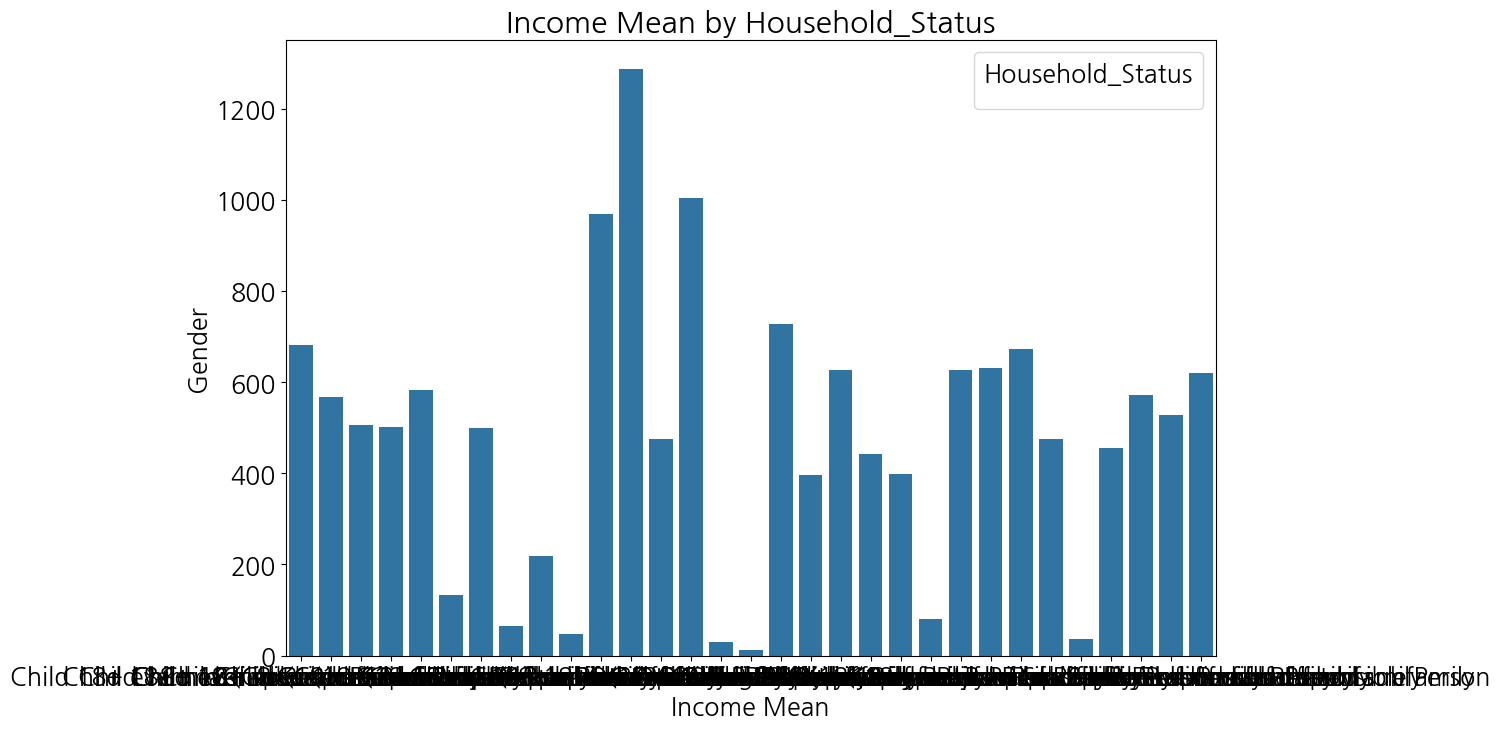

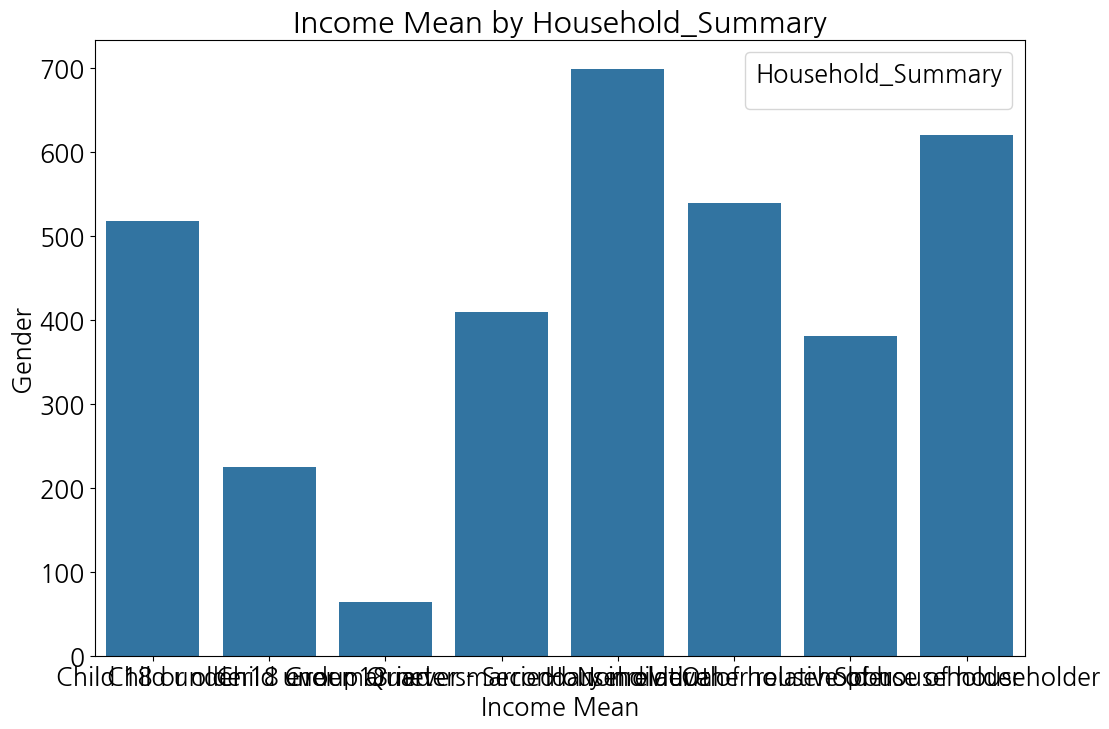

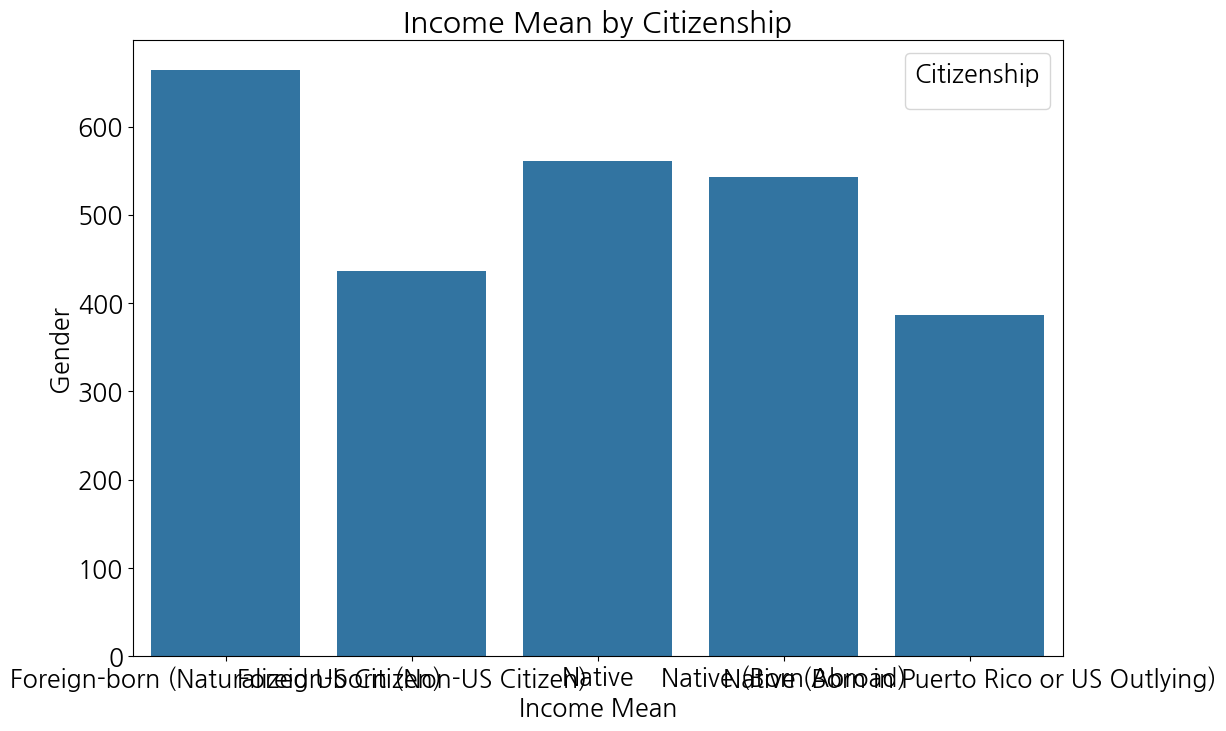

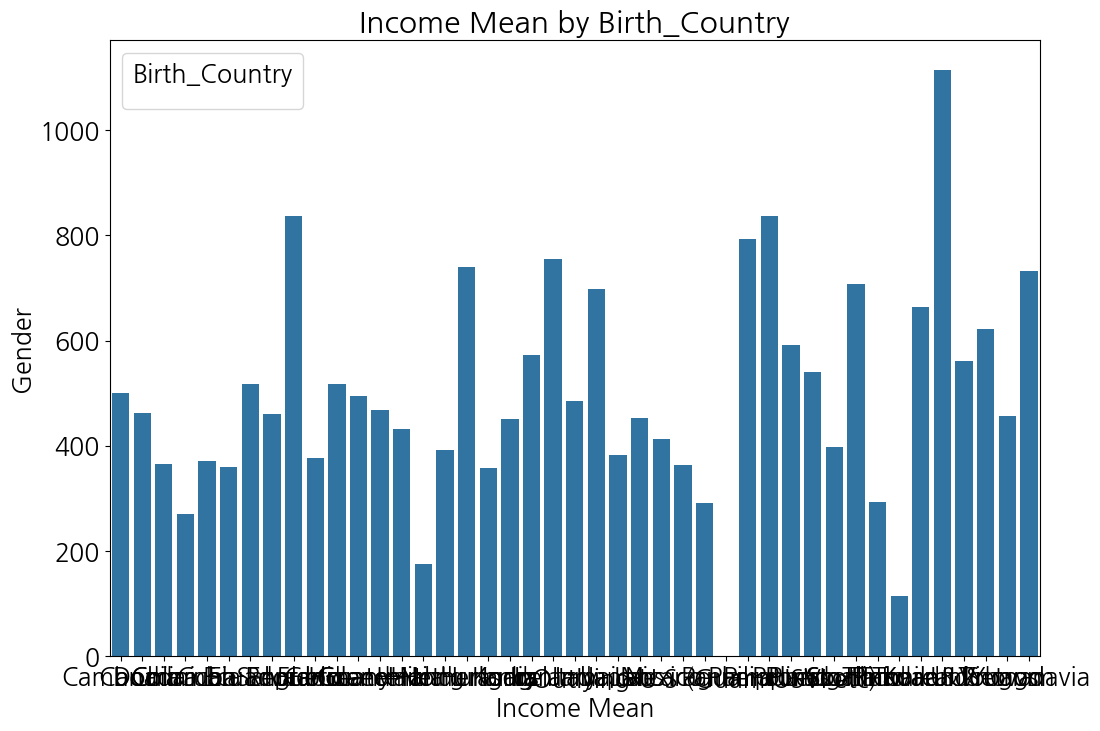

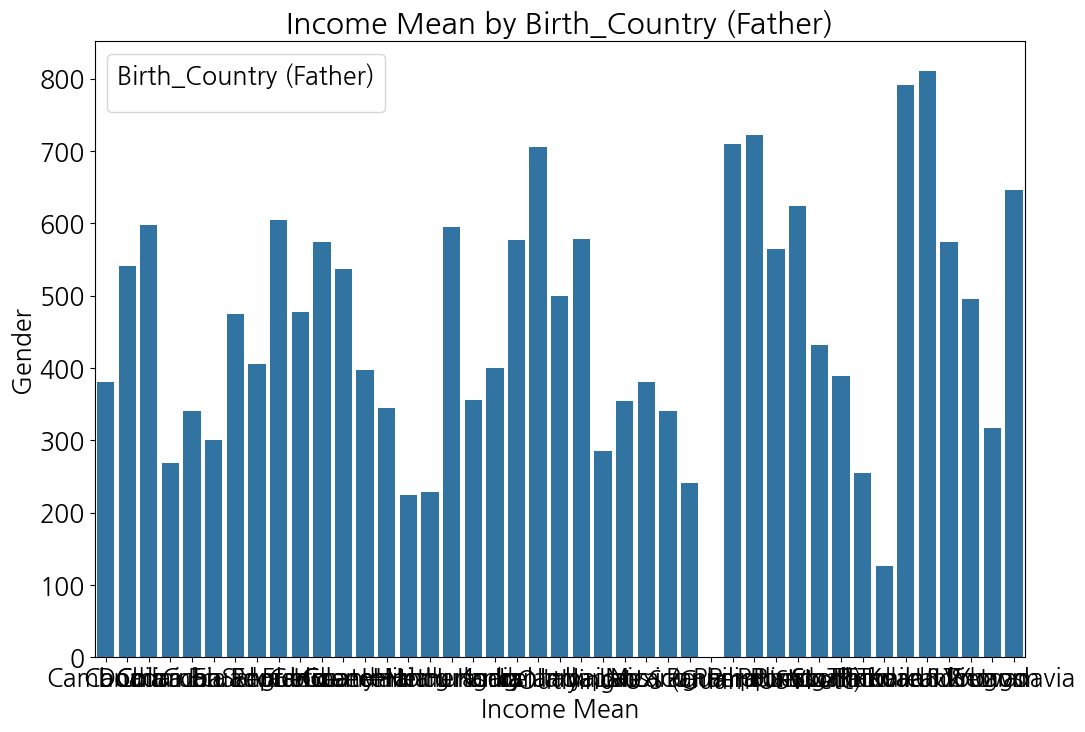

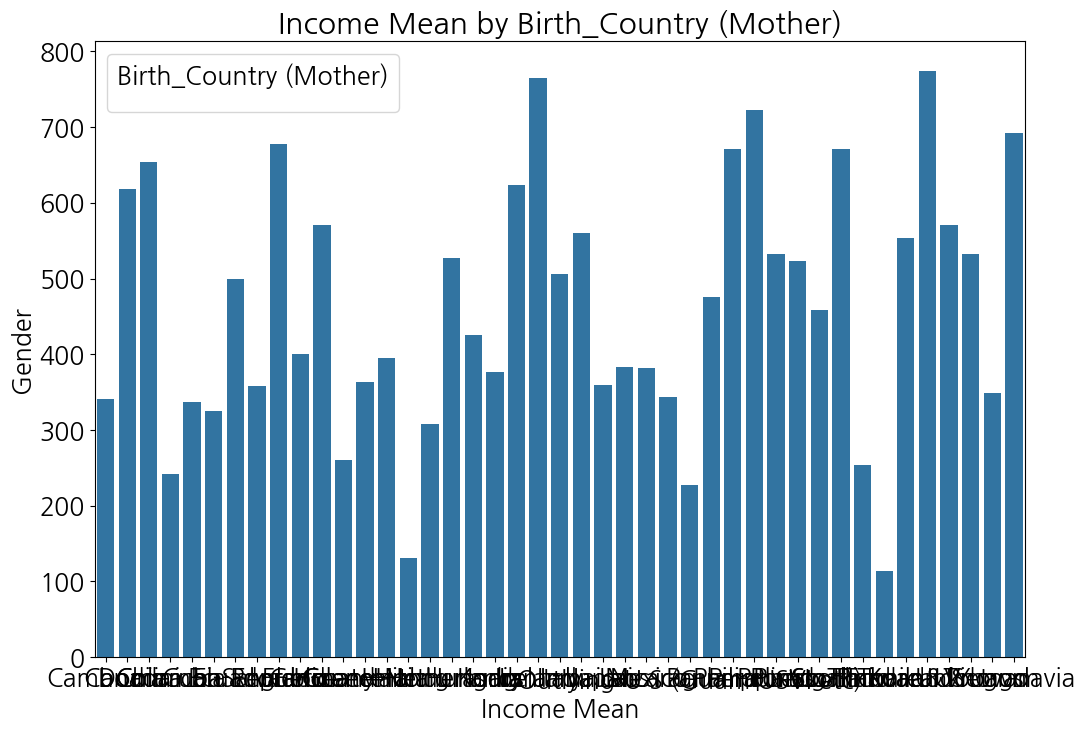

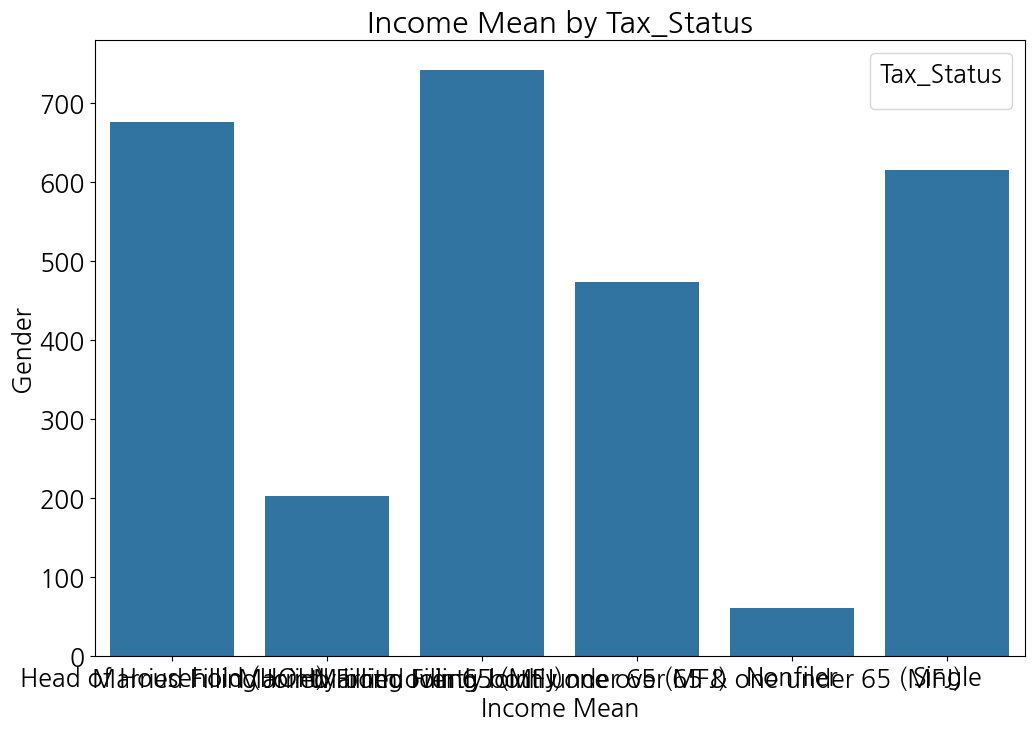

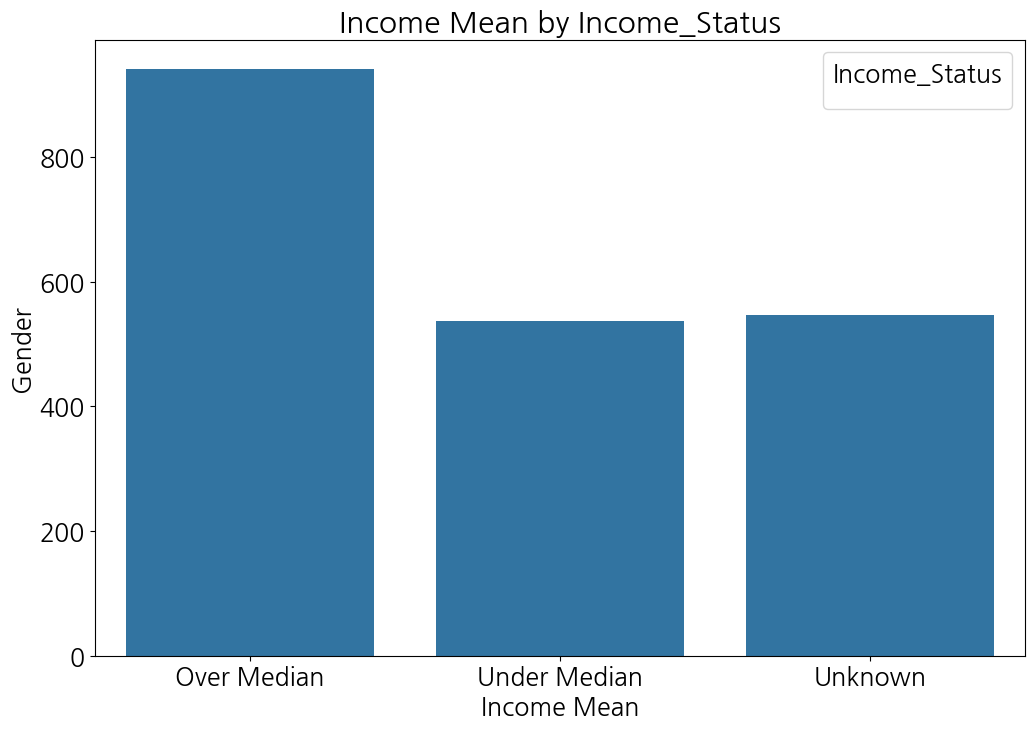

In [30]:
categorical_columns = train.select_dtypes(include='object').columns

# 각 범주형 컬럼에 대한 소득의 평균값을 계산
for i in range(len(categorical_columns)):
  mean_by_category = train.groupby(categorical_columns[i])['Income'].mean().reset_index()

  # 그래프 생성
  plt.figure(figsize=(12, 8))
  ax = sns.barplot(x=categorical_columns[i], y='Income', data=mean_by_category)

  # 막대 위에 수치 표시
  for p in ax.patches:
      ax.annotate(f'{round(p.get_width(), 2)}', (p.get_width() + 100, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

  plt.ylabel('Income Mean')
  plt.xlabel(categorical_columns[0])
  plt.title(f'Income Mean by {(categorical_columns[i])}')

  # 범례 추가
  plt.legend(title=categorical_columns[i])

  # 그래프 출력
  plt.show()

In [94]:
income_mean = train.groupby('Gender')['Income'].agg(['mean', 'count']).reset_index()
income_mean.sort_values(by='mean', ascending=False)

Gender        mean  count
1      M  623.620382   9528
0      F  491.735103  10472

In [95]:
income_mean = train.groupby('Education_Status')['Income'].agg(['mean', 'count']).reset_index()
income_mean.sort_values(by='mean', ascending=False)
#Associates degree (Vocational) - 직업과 관련된 특수교육
#Associates degree (Academic) - 준학사
# 전문학사 (실업교육): $867.27
# 전문학사 (학문적): $782.74
# 학사 학위: $699.37
# 고등 졸업: $664.65
# 대학: $651.47
# 석사 학위: $616.10
# 박사 학위: $575.53
# 전문 학위: $547.04
# 고졸: $483.03
# 고졸 (졸업): $459.94
# 고졸 (2학년): $408.66
# 고졸 (1학년): $366.79
# 중학교 (7-8학년): $346.88
# 초등학교 (1-4학년): $343.44
# 초등학교 (5-6학년): $325.12
# 유치원: $187.64
# 어린이: $0.00

Education_Status        mean  count
1   Associates degree (Vocational)  867.269906    741
0     Associates degree (Academic)  782.740558    609
2                 Bachelors degree  699.367076   1956
12                   High graduate  664.652140   6494
4                          College  651.468108   3794
14                  Masters degree  616.102970    505
5                 Doctorate degree  575.528736     87
16             Professional degree  547.036036    111
9                      High Junior  483.034146    820
10                     High Senior  459.942149    242
11                  High Sophomore  408.658323    799
8                    High Freshman  366.794595    555
15                    Middle (7-8)  346.883212    548
6                 Elementary (1-4)  343.440000    150
7                 Elementary (5-6)  325.116719    317
13                    Kindergarten  187.640625     64
3                         Children    0.000000   2208

In [97]:
income_mean = train.groupby('Employment_Status')['Income'].agg(['mean', 'count']).reset_index()
income_mean.sort_values(by='mean', ascending=False)
# '''
# Part-Time: Fewer than 35 hours per week
# Full-Time: More than 35 hours per week
# '''

Employment_Status        mean  count
5  Part-Time (Usually Part-Time)  877.905063    158
1               Choice Part-Time  792.866779    593
4  Part-Time (Usually Full-Time)  757.970000    100
2                      Full-Time  746.928051   6588
0       Children or Armed Forces  488.226979  11142
7              Seeking Part-Time  367.584416     77
6              Seeking Full-Time  146.595041    121
3                    Not Working    0.000000   1221

In [99]:
income_mean = train.groupby('Industry_Status')['Income'].agg(['mean', 'count']).reset_index()
income_mean.sort_values(by='mean', ascending=False)
# '''
# Utilities & Sanitary (유틸리티 및 위생 서비스-가스,전기,물): $1115.29
# Hospitals (병원): $1040.19
# Transportation (운송): $977.87
# Mining (광업): $975.70
# Public Administration (공공 행정): $959.97
# Communications (통신): $952.84
# Manufacturing (Durable) (제조업 - 내구재): $907.41
# Construction (건설): $887.16
# Other professional services (기타 전문 서비스): $747.37
# Manufacturing (Non-durable) (제조업 - 비내구재): $739.13
# Medical (except Hospitals) (의료 - 병원 제외): $718.08
# Entertainment (엔터테인먼트): $703.64
# Business & Repair (사업 및 수리): $646.85
# Wholesale (도매): $628.54
# Finance Insurance & Real Estate (금융, 보험 및 부동산): $625.62
# Education (교육): $616.39
# Social Services (사회 서비스): $608.77
# Forestry & Fisheries (산림 및 어업): $592.04
# Retail (소매): $527.74
# Personal Services (except Private Household) (개인 서비스 - 개인 가정 제외): $473.62
# Private Household Services (개인 가정 서비스): $449.20
# Agriculture (농업): $434.63
# Not in universe or children (해당사항없음 또는 어린이): $0.00
# Armed Forces (무장 군대): $0.00
# '''

Industry_Status         mean  count
22                          Utilities & Sanitary  1115.292079    202
9                                      Hospitals  1040.193666    821
21                                Transportation   977.865801    693
13                                        Mining   975.700935    107
18                         Public Administration   959.973479    641
3                                 Communications   952.835897    195
10                       Manufacturing (Durable)   907.412063   1575
4                                   Construction   887.155048    832
15                   Other professional services   747.366876    477
11                   Manufacturing (Non-durable)   739.130826   1223
12                    Medical (except Hospitals)   718.083532    838
6                                  Entertainment   703.643885    278
2                              Business & Repair   646.846517    847
23                                     Wholesale   628.542222    450
7                Finance Insurance & Real Estate   625.617607    727
5                                      Education   616.393852   1041
20                               Social Services   608.765668    367
8                           Forestry & Fisheries   592.038462     26
19                                        Retail   527.744681   3149
16  Personal Services (except Private Household)   473.620047    429
17                    Private Household Services   449.200000    125
0                                    Agriculture   434.630597    268
14                   Not in universe or children     0.000000   4688
1                                   Armed Forces     0.000000      1

In [100]:
income_mean = train.groupby('Occupation_Status')['Income'].agg(['mean', 'count']).reset_index()
income_mean.sort_values(by='mean', ascending=False)
# '''
# Technicians & Support (기술자 및 지원): $1002.42
# Craft & Repair (공예 및 수리): $986.42
# Professional (전문가): $884.71
# Transportation (운송): $846.00
# Protective Services (안전 보호 서비스): $823.51
# Machine Operators & Inspectors (기계 조작자 및 검사원): $802.06
# Admin Support (include Clerical) (행정 지원 - 사무 포함): $750.37
# Handlers/Cleaners (작업자/청소부): $655.15
# Management (관리직): $619.18
# Services (서비스): $512.06
# Sales (판매): $488.01
# Farming & Forestry & Fishing (농업 및 산림 및 어업): $477.92
# Private Household Services (개인 가정 서비스): $420.86
# Armed Forces (무장 군대): $0.00
# Unknown (알 수 없음): $0.00
# '''

Occupation_Status         mean  count
12             Technicians & Support  1002.417563    558
2                     Craft & Repair   986.415730   1869
8                       Professional   884.705645   1488
13                    Transportation   846.002899    690
9                Protective Services   823.511538    260
5     Machine Operators & Inspectors   802.055676   1383
0   Admin Support (include Clerical)   750.374677   2709
4                  Handlers/Cleaners   655.152927    837
6                         Management   619.179118   1111
11                          Services   512.062257   2313
10                             Sales   488.010638   1692
3       Farming & Forestry & Fishing   477.922297    296
7         Private Household Services   420.857143    105
1                       Armed Forces     0.000000      1
14                           Unknown     0.000000   4688

In [101]:
income_mean = train.groupby('Race')['Income'].agg(['mean', 'count']).reset_index()
income_mean.sort_values(by='mean', ascending=False)

Race        mean  count
4                         White  563.554230  16845
2  Native American/Aleut/Eskimo  533.079646    226
0                 Asian/Pacific  524.512720    511
1                         Black  512.730914   2122
3                         Other  411.206081    296

In [102]:
income_mean = train.groupby('Hispanic_Origin')['Income'].agg(['mean', 'count']).reset_index()
income_mean.sort_values(by='mean', ascending=False)

Hispanic_Origin        mean  count
2                     Chicano  644.925926     27
0                   All other  574.993697  17769
6            Mexican-American  420.946483    654
5          Mexican (Mexicano)  395.666667    624
9                Puerto Rican  385.090535    243
8               Other Spanish  381.213930    201
3                       Cuban  370.802632     76
1   Central or South American  356.089231    325
4                 Do not know  268.090909     22
7                          NA  247.881356     59

In [104]:
income_mean = train.groupby('Martial_Status')['Income'].agg(['mean', 'count']).reset_index()
income_mean.sort_values(by='mean', ascending=False)
# '''
# Married (Armed Force Spouse) (기혼 - 군인의 배우자): $920.00
# Divorced (이혼): $692.34
# Married (기혼): $687.20
# Separated (별거): $632.19
# Married (Spouse Absent) (기혼 - 배우자 부재): $528.07
# Single (독신): $368.48
# Widowed (사별): $324.72
# '''

Martial_Status        mean  count
2  Married (Armed Force Spouse)  920.000000     70
0                      Divorced  692.336803   1633
1                       Married  687.201172   9554
4                     Separated  632.185780    436
3       Married (Spouse Absent)  528.070175    171
5                        Single  368.479404   7380
6                       Widowed  324.719577    756

In [105]:
income_mean = train.groupby('Household_Status')['Income'].agg(['mean', 'count']).reset_index()
income_mean.sort_values(by='mean', ascending=False)
# '''
# 'Child 18+ ever marr Not in a subfamily': 18세 이상의 자녀 중 어떠한 가족 단위에도 속하지 않은 결혼 경험이 있는 경우
# 'Child 18+ ever married Responsible Person of subfamily': 18세 이상의 자녀 중 어떠한 가족 단위의 책임자이며 결혼 경험이 있는 경우
# 'Child 18+ never marr Not in a subfamily': 18세 이상의 자녀 중 어떠한 가족 단위에도 속하지 않은 결혼 경험이 없는 경우
# 'Child 18+ never married Responsible Person of subfamily': 18세 이상의 자녀 중 어떠한 가족 단위의 책임자이며 결혼 경험이 없는 경우
# 'Child 18+ spouse of subfamily Responsible Person': 18세 이상의 자녀 중 어떠한 가족 단위의 책임자의 배우자인 경우
# 'Child <18 ever marr not in subfamily': 18세 미만의 자녀 중 어떠한 가족 단위에도 속하지 않은 결혼 경험이 있는 경우
# 'Child <18 ever married Responsible Person of subfamily': 18세 미만의 자녀 중 어떠한 가족 단위의 책임자이며 결혼 경험이 있는 경우
# 'Child <18 never marr not in subfamily': 18세 미만의 자녀 중 어떠한 가족 단위에도 속하지 않은 결혼 경험이 없는 경우
# 'Child <18 never married Responsible Person of subfamily': 18세 미만의 자녀 중 어떠한 가족 단위의 책임자이며 결혼 경험이 없는 경우
# 'Child under 18 of Responsible Person of unrelated subfamily': 18세 미만의 자녀로, 다른 가족 단위의 책임자의 자녀인 경우
# 'Grandchild 18+ ever marr not in subfamily': 18세 이상의 손자/손녀 중 어떠한 가족 단위에도 속하지 않은 결혼 경험이 있는 경우
# 'Grandchild 18+ ever married Responsible Person of subfamily': 18세 이상의 손자/손녀 중 어떠한 가족 단위의 책임자이며 결혼 경험이 있는 경우
# 'Grandchild 18+ never marr not in subfamily': 18세 이상의 손자/손녀 중 어떠한 가족 단위에도 속하지 않은 결혼 경험이 없는 경우
# 'Grandchild 18+ spouse of subfamily Responsible Person': 18세 이상의 손자/손녀 중 어떠한 가족 단위의 책임자의 배우자인 경우
# 'Grandchild <18 never marr not in subfamily': 18세 미만의 손자/손녀 중 어떠한 가족 단위에도 속하지 않은 결혼 경험이 없는 경우
# 'Grandchild <18 never married child of subfamily Responsible Person': 18세 미만의 손자/손녀 중 어떠한 가족 단위의 책임자의 자녀이며 결혼 경험이 없는 경우
# 'Householder': 가장(가구주)
# 'In group quarters': 집단 거주시설에 거주하는 경우
# 'Nonfamily householder': 비가족 가구주
# 'Other Rel 18+ ever marr not in subfamily': 18세 이상의 다른 관계의 가족 구성원 중 어떠한 가족 단위에도 속하지 않은 결혼 경험이 있는 경우
# 'Other Rel 18+ never marr not in subfamily': 18세 이상의 다른 관계의 가족 구성원 중 어떠한 가족 단위에도 속하지 않은 결혼 경험이 없는 경우
# 'Other Rel <18 never marr not in subfamily': 18세 미만의 다른 관계의 가족 구성원 중 어떠한 가족 단위에도 속하지 않은 결혼 경험이 없는 경우
# 'Other Relative 18+ ever married Responsible Person of subfamily': 18세 이상의 다른 관계의 가족 구성원 중 어떠한 가족 단위의 책임자이며 결혼 경험이 있는 경우
# 'Other Relative 18+ never married Responsible Person of subfamily': 18세 이상의 다른 관계의 가족 구성원 중 어떠한 가족 단위의 책임자이며 결혼 경험이 없는 경우
# 'Other Relative 18+ spouse of subfamily Responsible Person': 18세 이상의 다른 관계의 가족 구성원 중 어떠한 가족 단위의 책임자의 배우자인 경우
# 'Other Relative <18 ever married Responsible Person of subfamily': 18세 미만의 다른 관계의 가족 구성원 중 어떠한 가족 단위의 책임자이며 결혼 경험이 있는 경우
# 'Other Relative <18 never married child of subfamily Responsible Person': 18세 미만의 다른 관계의 가족 구성원 중 어떠한 가족 단위의 책임자의 자녀이며 결혼 경험이 없는 경우
# 'Responsible Person of unrelated subfamily': 다른 가족 단위의 책임자인 경우
# 'Secondary individual': 부가적인 개인
# 'Spouse of Responsible Person of unrelated subfamily': 다른 가족 단위의 책임자의 배우자인 경우
# 'Spouse of householder': 가구주의 배우자인 경우
# '''

Household_Status         mean  count
11  Grandchild 18+ ever married Responsible Person...  1288.000000      1
13  Grandchild 18+ spouse of subfamily Responsible...  1005.000000      1
10          Grandchild 18+ ever marr not in subfamily   968.333333      3
16                                        Householder   728.328241   6087
0              Child 18+ ever marr Not in a subfamily   682.322034    118
24  Other Relative 18+ spouse of subfamily Respons...   673.890411     73
23  Other Relative 18+ never married Responsible P...   631.105263     19
22  Other Relative 18+ ever married Responsible Pe...   627.233766     77
18                              Nonfamily householder   625.933469   2465
30                              Spouse of householder   620.124322   4794
4    Child 18+ spouse of subfamily Responsible Person   583.750000     16
28                               Secondary individual   571.052071    845
1   Child 18+ ever married Responsible Person of s...   568.554455    101
29  Spouse of Responsible Person of unrelated subf...   528.000000      3
2             Child 18+ never marr Not in a subfamily   505.561828   1860
3   Child 18+ never married Responsible Person of ...   502.687500     96
6   Child <18 ever married Responsible Person of s...   500.000000      1
12         Grandchild 18+ never marr not in subfamily   475.682540     63
25  Other Relative <18 ever married Responsible Pe...   475.000000      1
27          Responsible Person of unrelated subfamily   456.011494     87
19           Other Rel 18+ ever marr not in subfamily   442.629870    154
20          Other Rel 18+ never marr not in subfamily   398.989744    195
17                                  In group quarters   395.730769     26
8   Child <18 never married Responsible Person of ...   219.375000      8
5                Child <18 ever marr not in subfamily   133.333333      3
21          Other Rel <18 never marr not in subfamily    81.111111     36
7               Child <18 never marr not in subfamily    63.779775   2670
9   Child under 18 of Responsible Person of unrela...    47.692308     39
26  Other Relative <18 never married child of subf...    35.740741     27
14         Grandchild <18 never marr not in subfamily    29.883721     43
15  Grandchild <18 never married child of subfamil...    12.897727     88

In [106]:
income_mean = train.groupby('Household_Summary')['Income'].agg(['mean', 'count']).reset_index()
income_mean.sort_values(by='mean', ascending=False)
# '''
# 'Householder' (가구주): $698.81
# 'Spouse of householder' (가구주의 배우자): $620.12
# 'Nonrelative of householder' (가구주와 관계 없는 사람): $539.69
# 'Child 18 or older' (18세 이상의 자녀): $518.40
# 'Group Quarters- Secondary individual' (집단 거주시설 - 부가적인 개인): $409.63
# 'Other relative of householder' (가구주의 다른 가족 구성원): $380.79
# 'Child under 18 ever married' (18세 미만의 자녀 중 결혼 경험이 있는 경우): $225.00
# 'Child under 18 never married' (18세 미만의 자녀 중 결혼 경험이 없는 경우): $64.22
# '''

Household_Summary        mean  count
4                           Householder  698.814312   8552
7                 Spouse of householder  620.124322   4794
5            Nonrelative of householder  539.687885    974
0                     Child 18 or older  518.402828   2192
3  Group Quarters- Secondary individual  409.625000     24
6         Other relative of householder  380.788732    781
1           Child under 18 ever married  225.000000      4
2          Child under 18 never married   64.220605   2679

In [107]:
income_mean = train.groupby('Citizenship')['Income'].agg(['mean', 'count']).reset_index()
income_mean.sort_values(by='mean', ascending=False)
# '''
# 'Foreign-born (Naturalized US Citizen)' (외국 출생자 - 미국 시민권자): $664.63
# 'Native' (출생지 미국인): $560.65
# 'Native (Born Abroad)' (출생지 미국인 - 해외 출생): $542.42
# 'Foreign-born (Non-US Citizen)' (외국 출생자 - 미국 시민이 아닌): $436.47
# 'Native (Born in Puerto Rico or US Outlying)' (출생지 미국인 - 푸에르토리코 또는 미국 외지 출생): $386.17
# '''

Citizenship        mean  count
0        Foreign-born (Naturalized US Citizen)  664.627551    588
2                                       Native  560.650659  17825
3                         Native (Born Abroad)  542.421320    197
1                Foreign-born (Non-US Citizen)  436.466614   1258
4  Native (Born in Puerto Rico or US Outlying)  386.166667    132

In [108]:
income_mean = train.groupby('Birth_Country')['Income'].agg(['mean', 'count']).reset_index()
income_mean.sort_values(by='mean', ascending=False)
# '''
# 'Trinadad&Tobago' (트리니다드와 토바고): $1115.00
# 'Philippines' (필리핀): $836.47
# 'England' (영국): $835.87
# 'Peru' (페루): $793.41
# 'Ireland' (아일랜드): $755.19
# 'Hong Kong' (홍콩): $739.06
# 'Yugoslavia' (유고슬라비아): $731.29
# 'Scotland' (스코틀랜드): $707.14
# 'Jamaica' (자메이카): $697.02
# 'Thailand' (태국): $663.80
# 'Unknown' (알 수 없음): $622.23
# 'Poland' (폴란드): $591.44
# 'Iran' (이란): $571.58
# 'US' (미국): $560.65
# 'Portugal' (포르투갈): $539.83
# 'Ecuador' (에콰도르): $517.10
# 'Germany' (독일): $516.78
# 'Cambodia' (캄보디아): $500.00
# 'Greece' (그리스): $494.23
# 'Italy' (이탈리아): $485.03
# 'Guatemala' (과테말라): $467.75
# 'Canada' (캐나다): $461.91
# 'El-Salvador' (엘살바도르): $461.09
# 'Vietnam' (베트남): $456.03
# 'Laos' (라오스): $451.91
# 'India' (인도): $451.78
# 'Haiti' (아이티): $432.80
# 'Mexico' (멕시코): $412.39
# 'Puerto-Rico' (푸에르토리코): $398.32
# 'Honduras' (온두라스): $391.79
# 'Japan' (일본): $382.80
# 'France' (프랑스): $375.93
# 'Cuba' (쿠바): $370.55
# 'China' (중국): $366.25
# 'Nicaragua' (니카라과): $364.29
# 'Dominican-Republic' (도미니카 공화국): $359.78
# 'Hungary' (헝가리): $357.50
# 'South Korea' (대한민국): $292.65
# 'Outlying-U S (Guam USVI etc)' (미국 외곽 지역 - 괌, 미국령 버진아일랜드 등): $291.33
# 'Columbia' (콜롬비아): $269.86
# 'Holand-Netherlands' (네덜란드): $175.00
# 'Taiwan' (대만): $114.09
# 'Panama' (파나마): $0.00
# '''

Birth_Country         mean  count
38               Trinadad&Tobago  1115.000000      8
30                   Philippines   836.473214    112
8                        England   835.872340     47
29                          Peru   793.409091     22
20                       Ireland   755.190476     21
16                     Hong Kong   739.062500     16
42                    Yugoslavia   731.285714      7
34                      Scotland   707.142857      7
22                       Jamaica   697.022222     45
37                      Thailand   663.800000     10
40                       Unknown   622.233333    330
31                        Poland   591.444444     45
19                          Iran   571.583333     24
39                            US   560.650659  17825
32                      Portugal   539.827586     29
6                        Ecuador   517.096774     31
10                       Germany   516.777778     90
0                       Cambodia   500.000000      8
11                        Greece   494.230769     13
21                         Italy   485.028571     35
12                     Guatemala   467.750000     28
1                         Canada   461.906667     75
7                    El-Salvador   461.088235     68
41                       Vietnam   456.032258     31
24                          Laos   451.909091     11
18                         India   451.781818     55
13                         Haiti   432.800000     25
25                        Mexico   412.387037    540
33                   Puerto-Rico   398.324786    117
15                      Honduras   391.785714     14
23                         Japan   382.800000     30
9                         France   375.928571     14
4                           Cuba   370.551724     58
2                          China   366.250000     28
26                     Nicaragua   364.285714     28
5             Dominican-Republic   359.775510     49
17                       Hungary   357.500000      4
35                   South Korea   292.645161     31
27  Outlying-U S (Guam USVI etc)   291.333333     15
3                       Columbia   269.861111     36
14            Holand-Netherlands   175.000000      3
36                        Taiwan   114.090909     11
28                        Panama     0.000000      4

In [109]:
income_mean = train.groupby('Birth_Country (Father)')['Income'].agg(['mean', 'count']).reset_index()
income_mean.sort_values(by='mean', ascending=False)

Birth_Country (Father)        mean  count
38               Trinadad&Tobago  811.363636     11
37                      Thailand  791.142857      7
30                   Philippines  722.214876    121
29                          Peru  709.807692     26
20                       Ireland  705.914894     47
42                    Yugoslavia  646.222222     18
32                      Portugal  624.212766     47
8                        England  604.797101     69
2                          China  598.246377     69
16                     Hong Kong  595.625000      8
22                       Jamaica  577.964286     56
19                          Iran  576.720000     25
10                       Germany  574.913043     92
39                            US  574.009177  16563
31                        Poland  564.245455    110
1                         Canada  541.609375    128
11                        Greece  536.545455     33
21                         Italy  499.654822    197
40                       Unknown  495.955250    581
9                         France  477.000000     17
6                        Ecuador  474.523810     42
33                   Puerto-Rico  431.169903    206
7                    El-Salvador  404.927711     83
18                         India  400.632353     68
12                     Guatemala  396.878788     33
34                      Scotland  388.370370     27
0                       Cambodia  381.153846     13
25                        Mexico  381.119527    845
17                       Hungary  355.227273     22
24                          Laos  353.833333     12
13                         Haiti  344.459459     37
26                     Nicaragua  340.000000     30
4                           Cuba  339.948718     78
41                       Vietnam  316.781250     32
5             Dominican-Republic  300.212121     99
23                         Japan  284.892857     28
3                       Columbia  268.666667     45
35                   South Korea  254.323529     34
27  Outlying-U S (Guam USVI etc)  241.250000     12
15                      Honduras  228.333333     12
14            Holand-Netherlands  225.000000      5
36                        Taiwan  125.500000     10
28                        Panama    0.000000      2

In [110]:
income_mean = train.groupby('Birth_Country (Mother)')['Income'].agg(['mean', 'count']).reset_index()
income_mean.sort_values(by='mean', ascending=False)

Birth_Country (Mother)        mean  count
38               Trinadad&Tobago  774.642857     14
20                       Ireland  764.189655     58
30                   Philippines  723.210938    128
42                    Yugoslavia  692.176471     17
8                        England  678.000000     88
29                          Peru  671.346154     26
34                      Scotland  671.333333     15
2                          China  653.783333     60
19                          Iran  623.769231     26
1                         Canada  618.144654    159
39                            US  571.103049  16594
10                       Germany  570.111111    117
22                       Jamaica  560.107143     56
37                      Thailand  553.166667     12
40                       Unknown  532.154739    517
31                        Poland  532.105769    104
16                     Hong Kong  526.500000     10
32                      Portugal  522.613636     44
21                         Italy  505.657895    152
6                        Ecuador  499.431818     44
28                        Panama  475.000000      4
33                   Puerto-Rico  458.891753    194
17                       Hungary  426.111111     18
9                         France  400.520000     25
13                         Haiti  395.441176     34
24                          Laos  383.250000      8
25                        Mexico  381.285041    849
18                         India  376.462687     67
12                     Guatemala  363.805556     36
23                         Japan  360.000000     37
7                    El-Salvador  357.666667     99
41                       Vietnam  348.589744     39
26                     Nicaragua  343.428571     35
0                       Cambodia  341.363636     11
4                           Cuba  337.287671     73
5             Dominican-Republic  324.880000     75
15                      Honduras  308.235294     17
11                        Greece  260.304348     23
35                   South Korea  254.195122     41
3                       Columbia  242.000000     45
27  Outlying-U S (Guam USVI etc)  226.785714     14
14            Holand-Netherlands  131.250000      4
36                        Taiwan  114.090909     11

In [111]:
income_mean = train.groupby('Tax_Status')['Income'].agg(['mean', 'count']).reset_index()
income_mean.sort_values(by='mean', ascending=False)
# 'Head of Household (HOH)' (세대주): 세대주 혼자 가구를 이끌고 있는 경우
# 'Married Filling Jointly both over 65 (MFJ)' (결혼 - 둘 다 65세 이상): 부부가 함께 세금 신고하며 둘 다 65세 이상인 경우
# 'Married Filling Jointly both under 65 (MFJ)' (결혼 - 둘 다 65세 미만): 부부가 함께 세금 신고하며 둘 다 65세 미만인 경우
# 'Married Filling Jointly one over 65 & one under 65 (MFJ)' (결혼 - 한 명은 65세 이상, 한 명은 65세 미만): 부부가 함께 세금 신고하며 한 명은 65세 이상이고 다른 한 명은 65세 미만인 경우
# 'Nonfiler' (비 신고자): 세금을 신고하지 않은 경우
# 'Single' (독신): 혼자 가구를 이끌고 있는 경우
# '''

Tax_Status        mean  count
2        Married Filling Jointly both under 65 (MFJ)  742.472403   8588
0                            Head of Household (HOH)  676.317995   1217
5                                             Single  615.808365   5547
3  Married Filling Jointly one over 65 & one unde...  474.095082    305
1         Married Filling Jointly both over 65 (MFJ)  203.144989    469
4                                           Nonfiler   60.947341   3874

In [112]:
income_mean = train.groupby('Income_Status')['Income'].agg(['mean', 'count']).reset_index()
income_mean.sort_values(by='mean', ascending=False)

Income_Status        mean  count
0   Over Median  941.084125    737
2       Unknown  545.810820   6026
1  Under Median  537.030294  13237

In [122]:
train_except = train[
    (
        (train['Education_Status'] != 'Children') &
        (train['Employment_Status'] != 'Not Working') &
        (train['Industry_Status'] != 'Not in universe or children') &
        (train['Industry_Status'] != 'Armed Forces') &
        (train['Occupation_Status'] != 'Armed Forces') &
        (train['Occupation_Status'] != 'Unknown')
    )].reset_index(drop=True)

In [120]:
test_except = test[
    (
        (test['Education_Status'] != 'Children') &
        (test['Employment_Status'] != 'Not Working') &
        (test['Industry_Status'] != 'Not in universe or children') &
        (test['Industry_Status'] != 'Armed Forces') &
        (test['Occupation_Status'] != 'Armed Forces') &
        (test['Occupation_Status'] != 'Unknown')
    )]

In [127]:
excluded_indices = test[
    ~(
        (test['Education_Status'] != 'Children') &
        (test['Employment_Status'] != 'Not Working') &
        (test['Industry_Status'] != 'Not in universe or children') &
        (test['Industry_Status'] != 'Armed Forces') &
        (test['Occupation_Status'] != 'Armed Forces') &
        (test['Occupation_Status'] != 'Unknown')
    )
].index

In [128]:
len(test_except), len(test), len(excluded_indices)

(7672, 10000, 2328)

In [123]:
train_except.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15281 entries, 0 to 15280
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     15281 non-null  int64 
 1   Gender                  15281 non-null  object
 2   Education_Status        15281 non-null  object
 3   Employment_Status       15281 non-null  object
 4   Working_Week (Yearly)   15281 non-null  int64 
 5   Industry_Status         15281 non-null  object
 6   Occupation_Status       15281 non-null  object
 7   Race                    15281 non-null  object
 8   Hispanic_Origin         15281 non-null  object
 9   Martial_Status          15281 non-null  object
 10  Household_Status        15281 non-null  object
 11  Household_Summary       15281 non-null  object
 12  Citizenship             15281 non-null  object
 13  Birth_Country           15281 non-null  object
 14  Birth_Country (Father)  15281 non-null  object
 15  Bi

In [126]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
object_columns = train_except.select_dtypes(include='object')
for feature in object_columns.columns:
    le = LabelEncoder()

    # Convert the column to string type
    train_except[feature] = train_except[feature].astype(str)
    le.fit(train_except[feature])
    train_except[feature] = le.transform(train_except[feature])

    # Make sure the test set has the same data type
    test_except[feature] = test_except[feature].astype(str)

    # Handle unseen labels in the test set
    for label in np.unique(test_except[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)

    test_except[feature] = le.transform(test_except[feature])

In [130]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.6 MB/s eta 0:00:00


In [131]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from math import sqrt
from sklearn.metrics import make_scorer, mean_squared_error

In [132]:
from sklearn.model_selection import train_test_split
X = train_except.drop(['Income'], axis=1)
y = train_except['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

In [133]:
from sklearn.model_selection import KFold
kf = StratifiedKFold(n_splits=5, shuffle=False)

In [150]:
def rmse_scorer(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# Random Forest
rf_model = RandomForestRegressor(random_state=43)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
rf_rmse = rmse_scorer(y_test, rf_predictions)


# Extra Trees
et_model = ExtraTreesRegressor(random_state=43)
et_model.fit(X_train, y_train)
et_predictions = et_model.predict(X_test)
et_scores = cross_val_score(et_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
et_rmse = rmse_scorer(y_test, et_predictions)

#xgb
xgb_model = xgb.XGBRegressor(random_state=43)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
xgb_rmse = rmse_scorer(y_test, xgb_predictions)

#cat
cat_model = CatBoostRegressor(random_seed=43)
cat_model.fit(X_train, y_train)
cat_predictions = cat_model.predict(X_test)
cat_scores = cross_val_score(cat_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
cat_rmse = rmse_scorer(y_test, cat_predictions)

#lgb
lgb_model = LGBMRegressor(random_state=43)
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)
lgb_scores = cross_val_score(lgb_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
lgb_rmse = rmse_scorer(y_test, lgb_predictions)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
46:	learn: 688.7688336	total: 142ms	remaining: 2.87s
47:	learn: 688.5143500	total: 144ms	remaining: 2.86s
48:	learn: 688.1792504	total: 147ms	remaining: 2.86s
49:	learn: 687.8303528	total: 150ms	remaining: 2.85s
50:	learn: 687.5215728	total: 152ms	remaining: 2.83s
51:	learn: 687.0932114	total: 155ms	remaining: 2.83s
52:	learn: 686.7864644	total: 158ms	remaining: 2.83s
53:	learn: 686.1991995	total: 161ms	remaining: 2.82s
54:	learn: 685.6230026	total: 164ms	remaining: 2.82s
55:	learn: 685.1330028	total: 167ms	remaining: 2.81s
56:	learn: 684.4805217	total: 172ms	remaining: 2.84s
57:	learn: 684.1070915	total: 180ms	remaining: 2.92s
58:	learn: 683.5475966	total: 186ms	remaining: 2.96s
59:	learn: 682.9039985	total: 194ms	remaining: 3.03s
60:	learn: 682.5213108	total: 196ms	remaining: 3.02s
61:	learn: 682.2519628	total: 199ms	remaining: 3s
62:	learn: 681.8584269	total: 201ms	remaining: 2.99s
63:	learn: 681.6274800	total: 204ms	remaining: 2.98s
64:	learn: 68

In [136]:
print(f'Random Forest Cross-Validation RMSE: {rf_scores.mean()}')
print(f'RF test RMSE: {rf_rmse}\n')
print(f'Extra Trees Cross-Validation RMSE: {et_scores.mean()}')
print(f'ET test RMSE: {et_rmse}\n')
print(f'XGBoost Cross-Validation RMSE: {xgb_scores.mean()}')
print(f'XGBoost test RMSE: {xgb_rmse}\n')
print(f'CatBoost Cross-Validation RMSE: {cat_scores.mean()}')
print(f'CatBoost test RMSE: {cat_rmse}\n')
print(f"Cross-validated LightGBM scores: {lgb_scores.mean()}")
print(f"LightGBM RMSE on test set: {lgb_rmse}")

Random Forest Cross-Validation RMSE: 726.1913803633204
RF test RMSE: 689.9860174284547

Extra Trees Cross-Validation RMSE: 757.531929562386
ET test RMSE: 707.1502695423356

XGBoost Cross-Validation RMSE: 726.5332655414156
XGBoost test RMSE: 696.3805628178882

CatBoost Cross-Validation RMSE: 699.9208311472315
CatBoost test RMSE: 666.8323894179767

Cross-validated LightGBM scores: 693.995826821103
LightGBM RMSE on test set: 661.6824524189578


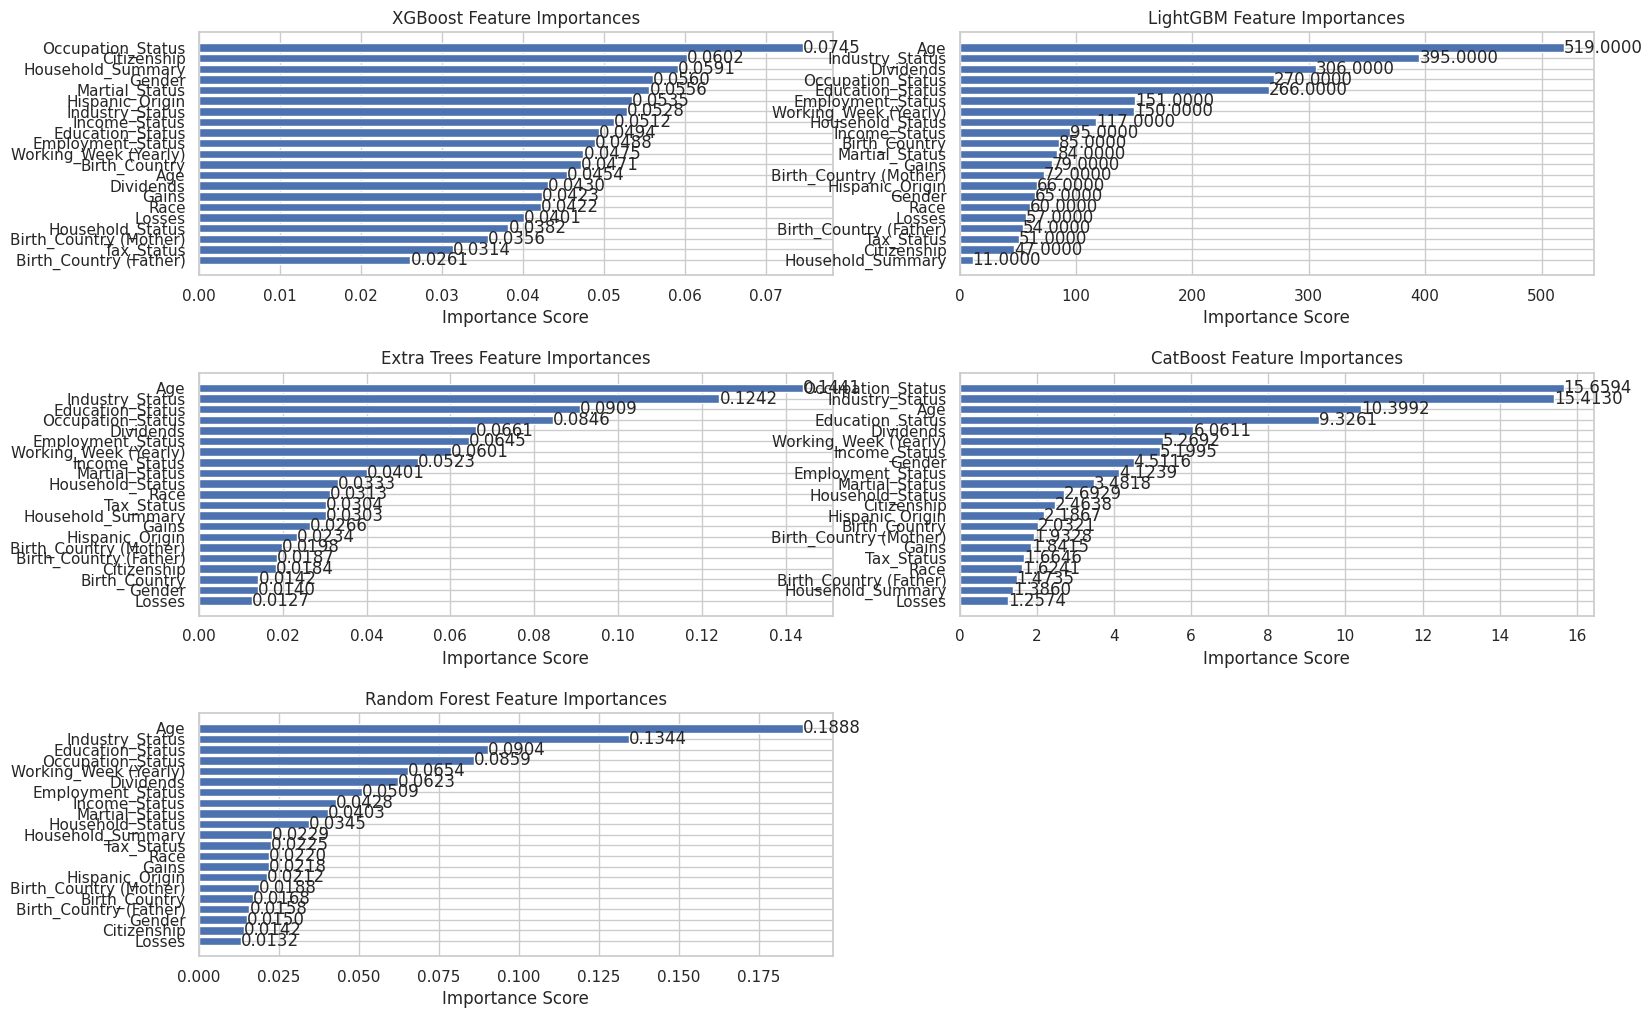

In [154]:
import matplotlib.pyplot as plt

feature_importances_xgb = xgb_model.feature_importances_
importance_df_xgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_xgb})
importance_df_xgb = importance_df_xgb.sort_values(by='Importance')


feature_importances_lgb = lgb_model.feature_importances_
importance_df_lgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_lgb})
importance_df_lgb = importance_df_lgb.sort_values(by='Importance')


feature_importances_rf = rf_model.feature_importances_
importance_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_rf})
importance_df_rf = importance_df_rf.sort_values(by='Importance')


feature_importances_et = et_model.feature_importances_
importance_df_et = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_et})
importance_df_et = importance_df_et.sort_values(by='Importance')

feature_importances_cat = cat_model.feature_importances_
importance_df_cat = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_cat})
importance_df_cat = importance_df_cat.sort_values(by='Importance')

# Plot feature importances for each model
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
fig.subplots_adjust(hspace=0.4)

# XGBoost
axes[0, 0].barh(importance_df_xgb['Feature'], importance_df_xgb['Importance'])
axes[0, 0].set_xlabel('Importance Score')
axes[0, 0].set_title('XGBoost Feature Importances')
for index, value in enumerate(importance_df_xgb['Importance']):
    axes[0, 0].text(value, index, f'{value:.4f}', ha='left', va='center')

# LightGBM
axes[0, 1].barh(importance_df_lgb['Feature'], importance_df_lgb['Importance'])
axes[0, 1].set_xlabel('Importance Score')
axes[0, 1].set_title('LightGBM Feature Importances')
for index, value in enumerate(importance_df_lgb['Importance']):
    axes[0, 1].text(value, index, f'{value:.4f}', ha='left', va='center')

# Random Forest
axes[2, 0].barh(importance_df_rf['Feature'], importance_df_rf['Importance'])
axes[2, 0].set_xlabel('Importance Score')
axes[2, 0].set_title('Random Forest Feature Importances')
for index, value in enumerate(importance_df_rf['Importance']):
    axes[2, 0].text(value, index, f'{value:.4f}', ha='left', va='center')

# Extra Trees
axes[1, 0].barh(importance_df_et['Feature'], importance_df_et['Importance'])
axes[1, 0].set_xlabel('Importance Score')
axes[1, 0].set_title('Extra Trees Feature Importances')
for index, value in enumerate(importance_df_et['Importance']):
    axes[1, 0].text(value, index, f'{value:.4f}', ha='left', va='center')

# CatBoost
axes[1, 1].barh(importance_df_cat['Feature'], importance_df_cat['Importance'])
axes[1, 1].set_xlabel('Importance Score')
axes[1, 1].set_title('CatBoost Feature Importances')
for index, value in enumerate(importance_df_cat['Importance']):
    axes[1, 1].text(value, index, f'{value:.4f}', ha='left', va='center')
# Remove the empty subplot
fig.delaxes(axes[2, 1])

plt.show()

In [137]:
from sklearn.ensemble import VotingRegressor
voting_regressor = VotingRegressor([('xgb', xgb_model), ('catboost', cat_model), ('et',et_model),('rf',rf_model),('lgb',lgb_model)])#cat_model로 수정필요
voting_regressor.fit(X_train, y_train)

voting_predictions = voting_regressor.predict(X_test)

voting_rmse = rmse_scorer(y_test, voting_predictions)
voting_scores = cross_val_score(voting_regressor, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
39:	learn: 692.3224325	total: 114ms	remaining: 2.74s
40:	learn: 691.8534678	total: 117ms	remaining: 2.74s
41:	learn: 691.3288627	total: 120ms	remaining: 2.73s
42:	learn: 690.7739812	total: 122ms	remaining: 2.72s
43:	learn: 690.1479079	total: 125ms	remaining: 2.71s
44:	learn: 689.5968943	total: 128ms	remaining: 2.72s
45:	learn: 689.1471602	total: 131ms	remaining: 2.71s
46:	learn: 688.7688336	total: 134ms	remaining: 2.71s
47:	learn: 688.5143500	total: 136ms	remaining: 2.7s
48:	learn: 688.1792504	total: 139ms	remaining: 2.69s
49:	learn: 687.8303528	total: 141ms	remaining: 2.69s
50:	learn: 687.5215728	total: 144ms	remaining: 2.67s
51:	learn: 687.0932114	total: 147ms	remaining: 2.68s
52:	learn: 686.7864644	total: 150ms	remaining: 2.68s
53:	learn: 686.1991995	total: 153ms	remaining: 2.68s
54:	learn: 685.6230026	total: 156ms	remaining: 2.68s
55:	learn: 685.1330028	total: 161ms	remaining: 2.71s
56:	learn: 684.4805217	total: 165ms	remaining: 2.73s
57:	learn: 

In [138]:
print(f'VotingRegressor Cross-Validation RMSE: {voting_scores.mean()}')
print(f'VotingRegressor test RMSE: {voting_rmse}')

VotingRegressor Cross-Validation RMSE: 701.6909232177126
VotingRegressor test RMSE: 666.0008014578048


In [139]:
from math import sqrt
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.feature_selection import RFECV
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [140]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
import numpy as np

def perform_rfecv(estimator, X_train, y_train, X_test, y_test, model_name):
    # Create RFECV object
    rfecv = RFECV(estimator=estimator, step=1, cv=kf, scoring='neg_mean_squared_error')

    # Fit RFECV on the training data
    rfecv.fit(X_train, y_train)

    # Get the selected features
    selected_features = X_train.columns[rfecv.support_]

    # Print the selected features
    print(f"Selected Features for {model_name}:", rfecv.support_.sum())
    print(f"Selected Features for {model_name}:", selected_features)

    # Transform the training and testing sets using only the selected features
    X_train_selected = rfecv.transform(X_train)
    X_test_selected = rfecv.transform(X_test)

    # Now, you can train your model using the selected features
    estimator.fit(X_train_selected, y_train)
    predictions = estimator.predict(X_test_selected)

    # Evaluate the model using RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"{model_name} RMSE:", rmse)

    # Plot the number of selected features vs. cross-validated RMSE score
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), np.sqrt(-rfecv.cv_results_['mean_test_score']), marker='o', linestyle='-', color='b')
    plt.title(f'{model_name} RMSE vs. Number of Features')
    plt.xlabel('Number of Features Selected')
    plt.ylabel(f'{model_name} RMSE Score')
    plt.grid(True)
    plt.show()

Selected Features for xgb: 2
Selected Features for xgb: Index(['Industry_Status', 'Occupation_Status'], dtype='object')
xgb RMSE: 673.264510327505


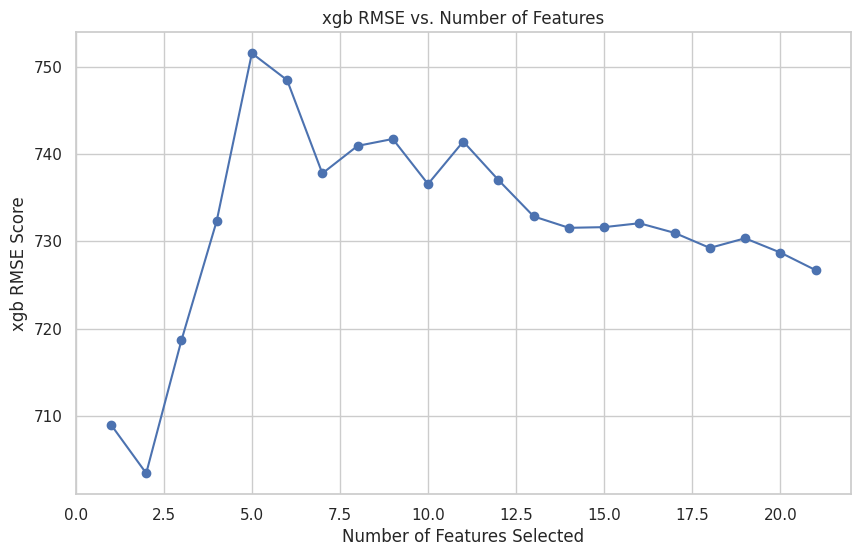

Selected Features for rf: 1
Selected Features for rf: Index(['Age'], dtype='object')
rf RMSE: 696.0837237004434


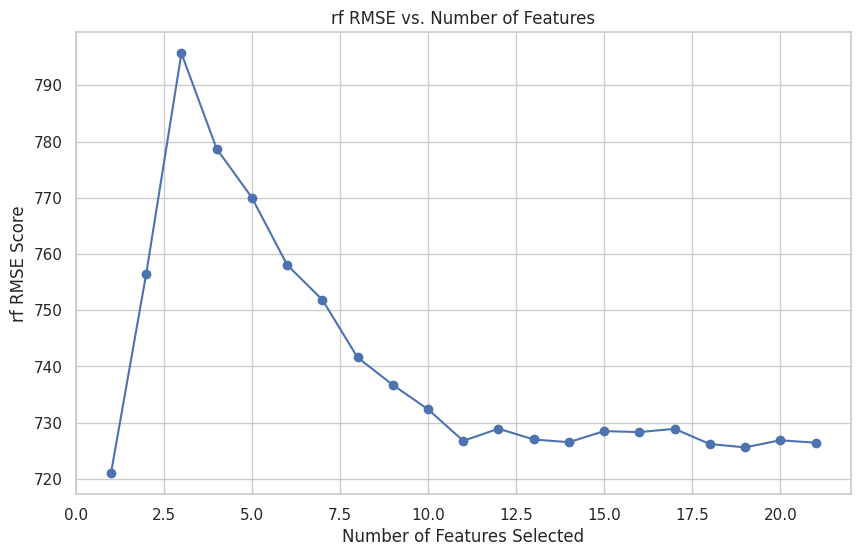

Selected Features for et: 1
Selected Features for et: Index(['Dividends'], dtype='object')
et RMSE: 711.3927270030366


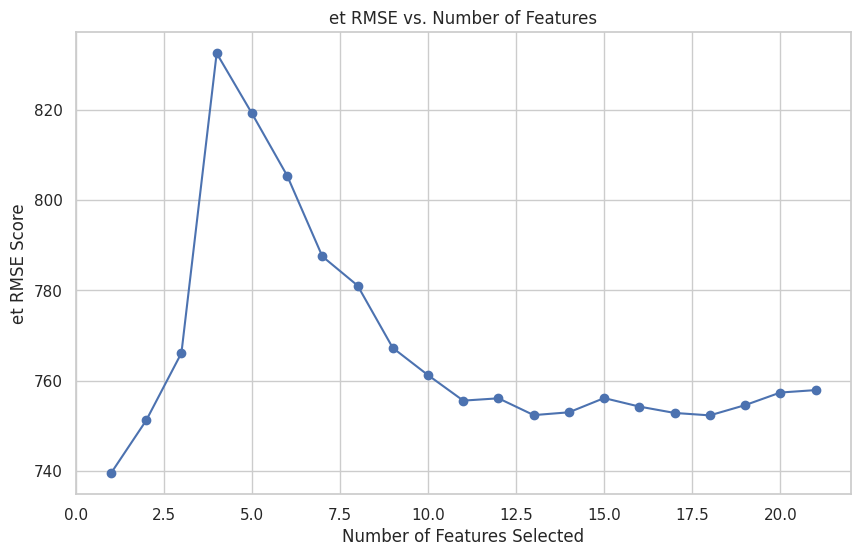

In [155]:
perform_rfecv(xgb_model, X_train, y_train, X_test, y_test, 'xgb')
perform_rfecv(rf_model, X_train, y_train, X_test, y_test, 'rf')
perform_rfecv(et_model, X_train, y_train, X_test, y_test, 'et')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
13:	learn: 715.5874330	total: 23.6ms	remaining: 1.66s
14:	learn: 715.0509267	total: 25.2ms	remaining: 1.65s
15:	learn: 714.7178064	total: 26.9ms	remaining: 1.65s
16:	learn: 714.3309704	total: 28.4ms	remaining: 1.64s
17:	learn: 713.8195437	total: 30.2ms	remaining: 1.65s
18:	learn: 713.4876189	total: 31.8ms	remaining: 1.64s
19:	learn: 713.2319189	total: 33.4ms	remaining: 1.64s
20:	learn: 712.6268740	total: 35ms	remaining: 1.63s
21:	learn: 712.2573844	total: 36.7ms	remaining: 1.63s
22:	learn: 711.8595628	total: 38.3ms	remaining: 1.63s
23:	learn: 711.5275853	total: 39.8ms	remaining: 1.62s
24:	learn: 711.1802527	total: 41.5ms	remaining: 1.62s
25:	learn: 711.0271581	total: 42.9ms	remaining: 1.6s
26:	learn: 710.5596083	total: 44.5ms	remaining: 1.6s
27:	learn: 710.2551329	total: 46.1ms	remaining: 1.6s
28:	learn: 709.8608895	total: 47.8ms	remaining: 1.6s
29:	learn: 709.3810539	total: 49.5ms	remaining: 1.6s
30:	learn: 709.1531145	total: 51.1ms	remaining: 1.59s

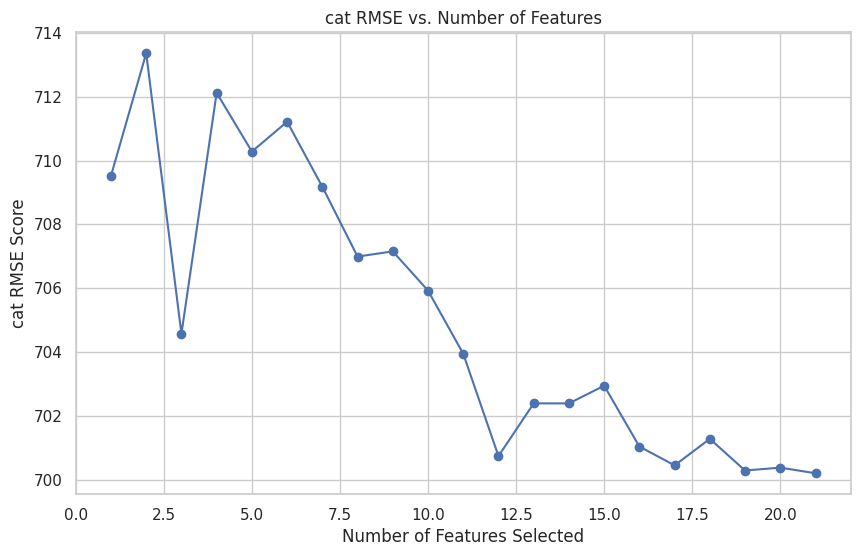

In [156]:
perform_rfecv(cat_model, X_train, y_train, X_test, y_test, 'cat')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 8556, number of used features: 21
[LightGBM] [Info] Start training from score 729.751286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 8556, number of used features: 20
[LightGBM] [Info] Start training from score 729.751286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

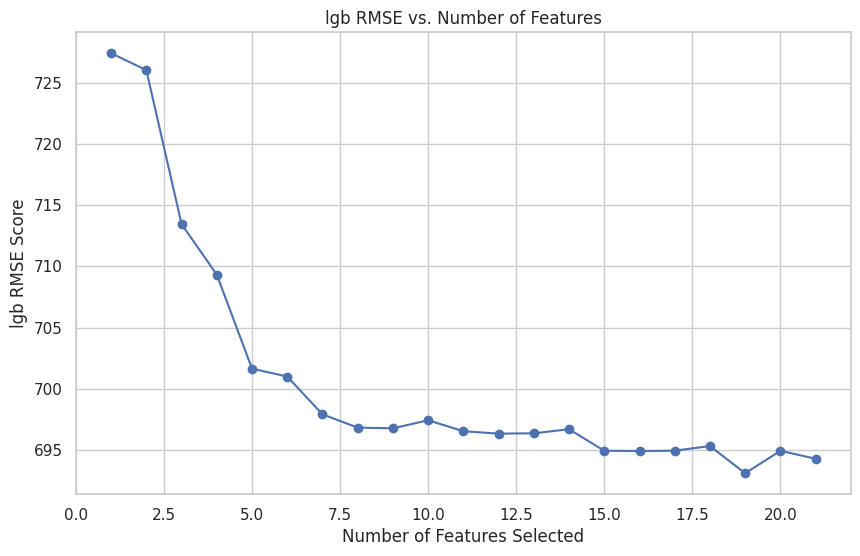

In [157]:
perform_rfecv(lgb_model, X_train, y_train, X_test, y_test, 'lgb')

In [161]:
def rmse_scorer(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# Random Forest
rf_model = RandomForestRegressor(random_state=43)
rf_model.fit(X_train[['Age']], y_train)
rf_predictions = rf_model.predict(X_test[['Age']])
rf_scores = cross_val_score(rf_model, X_train[['Age']], y_train, cv=kf, scoring=make_scorer(rmse_scorer))
rf_rmse = rmse_scorer(y_test, rf_predictions)


# Extra Trees
et_model = ExtraTreesRegressor(random_state=43)
et_model.fit(X_train[['Dividends']], y_train)
et_predictions = et_model.predict(X_test[['Dividends']])
et_scores = cross_val_score(et_model, X_train[['Dividends']], y_train, cv=kf, scoring=make_scorer(rmse_scorer))
et_rmse = rmse_scorer(y_test, et_predictions)

#xgb
xgb_model = xgb.XGBRegressor(random_state=43)
xgb_model.fit(X_train[['Industry_Status', 'Occupation_Status']], y_train)
xgb_predictions = xgb_model.predict(X_test[['Industry_Status', 'Occupation_Status']])
xgb_scores = cross_val_score(xgb_model, X_train[['Industry_Status', 'Occupation_Status']], y_train, cv=kf, scoring=make_scorer(rmse_scorer))
xgb_rmse = rmse_scorer(y_test, xgb_predictions)

#cat
cat_model = CatBoostRegressor(random_seed=43)
cat_model.fit(X_train, y_train)
cat_predictions = cat_model.predict(X_test)
cat_scores = cross_val_score(cat_model, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))
cat_rmse = rmse_scorer(y_test, cat_predictions)

#lgb
lgb_model = LGBMRegressor(random_state=43)
lgb_model.fit(X_train[['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)',
       'Tax_Status', 'Gains', 'Losses', 'Dividends', 'Income_Status']], y_train)
lgb_predictions = lgb_model.predict(X_test[['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)',
       'Tax_Status', 'Gains', 'Losses', 'Dividends', 'Income_Status']])
lgb_scores = cross_val_score(lgb_model, X_train[['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Birth_Country', 'Birth_Country (Father)', 'Birth_Country (Mother)',
       'Tax_Status', 'Gains', 'Losses', 'Dividends', 'Income_Status']], y_train, cv=kf, scoring=make_scorer(rmse_scorer))
lgb_rmse = rmse_scorer(y_test, lgb_predictions)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
46:	learn: 688.7688336	total: 237ms	remaining: 4.8s
47:	learn: 688.5143500	total: 240ms	remaining: 4.75s
48:	learn: 688.1792504	total: 243ms	remaining: 4.71s
49:	learn: 687.8303528	total: 245ms	remaining: 4.66s
50:	learn: 687.5215728	total: 248ms	remaining: 4.62s
51:	learn: 687.0932114	total: 251ms	remaining: 4.58s
52:	learn: 686.7864644	total: 254ms	remaining: 4.53s
53:	learn: 686.1991995	total: 257ms	remaining: 4.49s
54:	learn: 685.6230026	total: 259ms	remaining: 4.46s
55:	learn: 685.1330028	total: 262ms	remaining: 4.42s
56:	learn: 684.4805217	total: 265ms	remaining: 4.39s
57:	learn: 684.1070915	total: 268ms	remaining: 4.35s
58:	learn: 683.5475966	total: 271ms	remaining: 4.32s
59:	learn: 682.9039985	total: 274ms	remaining: 4.29s
60:	learn: 682.5213108	total: 277ms	remaining: 4.26s
61:	learn: 682.2519628	total: 279ms	remaining: 4.22s
62:	learn: 681.8584269	total: 282ms	remaining: 4.2s
63:	learn: 681.6274800	total: 285ms	remaining: 4.16s
64:	learn: 6

In [163]:
print(f'Random Forest Cross-Validation RMSE: {rf_scores.mean()}')
print(f'RF test RMSE: {rf_rmse}\n')
print(f'Extra Trees Cross-Validation RMSE: {et_scores.mean()}')
print(f'ET test RMSE: {et_rmse}\n')
print(f'XGBoost Cross-Validation RMSE: {xgb_scores.mean()}')
print(f'XGBoost test RMSE: {xgb_rmse}\n')
print(f'CatBoost Cross-Validation RMSE: {cat_scores.mean()}')
print(f'CatBoost test RMSE: {cat_rmse}\n')
print(f"Cross-validated LightGBM scores: {lgb_scores.mean()}")
print(f"LightGBM RMSE on test set: {lgb_rmse}")
# '''
# Random Forest Cross-Validation RMSE: 726.1913803633204
# RF test RMSE: 689.9860174284547

# Extra Trees Cross-Validation RMSE: 757.531929562386
# ET test RMSE: 707.1502695423356

# XGBoost Cross-Validation RMSE: 726.5332655414156
# XGBoost test RMSE: 696.3805628178882

# CatBoost Cross-Validation RMSE: 699.9208311472315
# CatBoost test RMSE: 666.8323894179767

# Cross-validated LightGBM scores: 693.995826821103
# LightGBM RMSE on test set: 661.6824524189578
# '''

Random Forest Cross-Validation RMSE: 720.6973693421023
RF test RMSE: 696.0837237004434

Extra Trees Cross-Validation RMSE: 739.077336682125
ET test RMSE: 711.3927270030366

XGBoost Cross-Validation RMSE: 703.0866549098748
XGBoost test RMSE: 673.264510327505

CatBoost Cross-Validation RMSE: 699.9208311472315
CatBoost test RMSE: 666.8323894179767

Cross-validated LightGBM scores: 694.1213842410959
LightGBM RMSE on test set: 663.4393939824845


In [148]:
from sklearn.ensemble import VotingRegressor
voting_regressor = VotingRegressor([('xgb', xgb_model), ('catboost', cat_model),('lgb',lgb_model),('et',et_model),('rf',rf_model)])
voting_regressor.fit(X_train, y_train)#.drop(['device','transaction_revenue','traffic_source'],axis=1)

voting_predictions = voting_regressor.predict(X_test)

voting_rmse = rmse_scorer(y_test, voting_predictions)
voting_scores = cross_val_score(voting_regressor, X_train, y_train, cv=kf, scoring=make_scorer(rmse_scorer))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
39:	learn: 692.3224325	total: 115ms	remaining: 2.77s
40:	learn: 691.8534678	total: 118ms	remaining: 2.76s
41:	learn: 691.3288627	total: 121ms	remaining: 2.76s
42:	learn: 690.7739812	total: 124ms	remaining: 2.75s
43:	learn: 690.1479079	total: 126ms	remaining: 2.75s
44:	learn: 689.5968943	total: 129ms	remaining: 2.74s
45:	learn: 689.1471602	total: 133ms	remaining: 2.75s
46:	learn: 688.7688336	total: 135ms	remaining: 2.74s
47:	learn: 688.5143500	total: 138ms	remaining: 2.73s
48:	learn: 688.1792504	total: 143ms	remaining: 2.77s
49:	learn: 687.8303528	total: 147ms	remaining: 2.8s
50:	learn: 687.5215728	total: 150ms	remaining: 2.79s
51:	learn: 687.0932114	total: 153ms	remaining: 2.79s
52:	learn: 686.7864644	total: 156ms	remaining: 2.78s
53:	learn: 686.1991995	total: 159ms	remaining: 2.78s
54:	learn: 685.6230026	total: 162ms	remaining: 2.78s
55:	learn: 685.1330028	total: 165ms	remaining: 2.77s
56:	learn: 684.4805217	total: 167ms	remaining: 2.77s
57:	learn: 

In [149]:
print(f'VotingRegressor Cross-Validation RMSE: {voting_scores.mean()}')
print(f'VotingRegressor test RMSE: {voting_rmse}')

VotingRegressor Cross-Validation RMSE: 701.6909232177126
VotingRegressor test RMSE: 666.0008014578048


In [187]:
selector = RFECV(estimator=xgb_model, step=1, cv=kf, scoring=make_scorer(rmse_scorer))
selector = selector.fit(X_train, y_train)

# Get the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Create the VotingRegressor with the selected features
voting_regressor = VotingRegressor([
    ('xgb', xgb_model),
    ('catboost', cat_model),
    ('lgb', lgb_model),
    ('et', et_model),
    ('rf', rf_model)
])

# Fit the VotingRegressor with the selected features
voting_regressor.fit(X_train_selected, y_train)

# Make predictions
voting_predictions = voting_regressor.predict(X_test_selected)

# Evaluate the performance
voting_rmse = rmse_scorer(y_test, voting_predictions)

# Optionally, you can also perform cross-validation with the selected features
voting_scores = cross_val_score(voting_regressor, X_train_selected, y_train, cv=kf, scoring=make_scorer(rmse_scorer))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
29:	learn: 702.5733884	total: 51.8ms	remaining: 1.68s
30:	learn: 702.1655967	total: 53.2ms	remaining: 1.66s
31:	learn: 701.8218368	total: 55ms	remaining: 1.66s
32:	learn: 701.4575723	total: 56.7ms	remaining: 1.66s
33:	learn: 701.0468420	total: 58.3ms	remaining: 1.66s
34:	learn: 700.6993870	total: 60ms	remaining: 1.65s
35:	learn: 700.3393892	total: 61.4ms	remaining: 1.64s
36:	learn: 700.0436828	total: 63.1ms	remaining: 1.64s
37:	learn: 699.7449644	total: 64.7ms	remaining: 1.64s
38:	learn: 699.4381245	total: 66.3ms	remaining: 1.63s
39:	learn: 699.0477853	total: 68ms	remaining: 1.63s
40:	learn: 698.5794356	total: 69.6ms	remaining: 1.63s
41:	learn: 698.2491460	total: 71.1ms	remaining: 1.62s
42:	learn: 697.9575270	total: 72.8ms	remaining: 1.62s
43:	learn: 697.7026594	total: 74.3ms	remaining: 1.61s
44:	learn: 697.3279356	total: 75.9ms	remaining: 1.61s
45:	learn: 697.1101446	total: 77.5ms	remaining: 1.61s
46:	learn: 696.5240197	total: 79.2ms	remaining: 1.6s

In [190]:
voting_scores.mean(),voting_rmse

(726.8603383906351, 694.4289786214014)

Selected Features for xgb: 2
Selected Features for xgb: Index(['Industry_Status', 'Occupation_Status'], dtype='object')
xgb RMSE: 673.264510327505


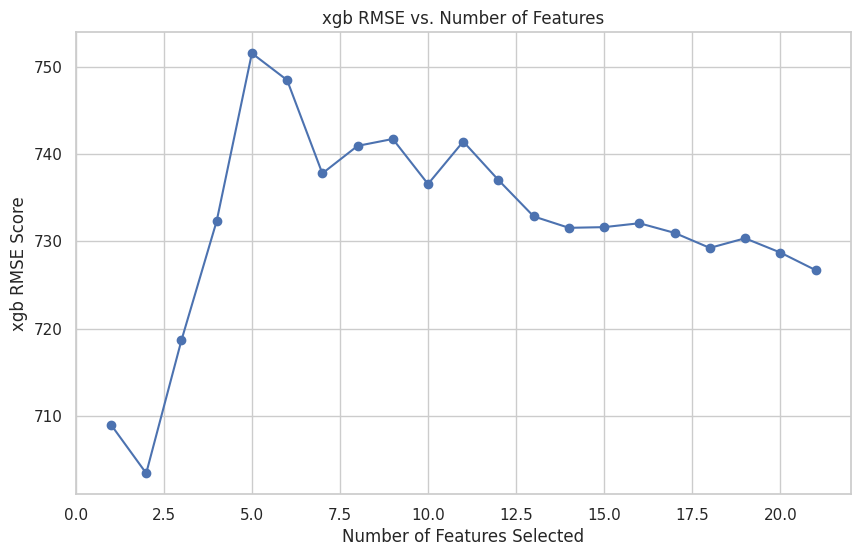

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
13:	learn: 715.5874330	total: 61.7ms	remaining: 4.35s
14:	learn: 715.0509267	total: 65.6ms	remaining: 4.31s
15:	learn: 714.7178064	total: 69.5ms	remaining: 4.27s
16:	learn: 714.3309704	total: 73.3ms	remaining: 4.24s
17:	learn: 713.8195437	total: 77.4ms	remaining: 4.22s
18:	learn: 713.4876189	total: 81.4ms	remaining: 4.21s
19:	learn: 713.2319189	total: 85.5ms	remaining: 4.19s
20:	learn: 712.6268740	total: 89.8ms	remaining: 4.19s
21:	learn: 712.2573844	total: 93.4ms	remaining: 4.15s
22:	learn: 711.8595628	total: 97.4ms	remaining: 4.14s
23:	learn: 711.5275853	total: 101ms	remaining: 4.12s
24:	learn: 711.1802527	total: 105ms	remaining: 4.11s
25:	learn: 711.0271581	total: 109ms	remaining: 4.09s
26:	learn: 710.5596083	total: 112ms	remaining: 4.04s
27:	learn: 710.2551329	total: 117ms	remaining: 4.05s
28:	learn: 709.8608895	total: 120ms	remaining: 4.03s
29:	learn: 709.3810539	total: 125ms	remaining: 4.03s
30:	learn: 709.1531145	total: 129ms	remaining: 4.02s


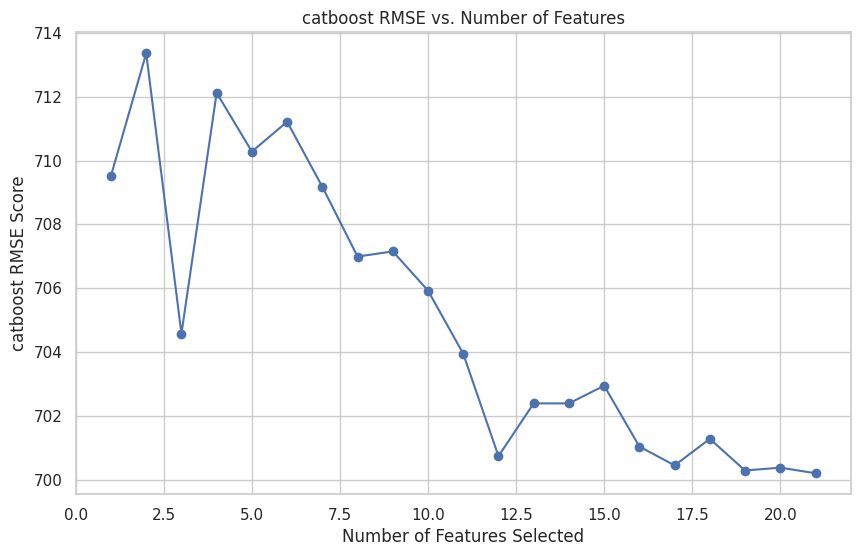

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 8556, number of used features: 21
[LightGBM] [Info] Start training from score 729.751286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 8556, number of used features: 20
[LightGBM] [Info] Start training from score 729.751286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

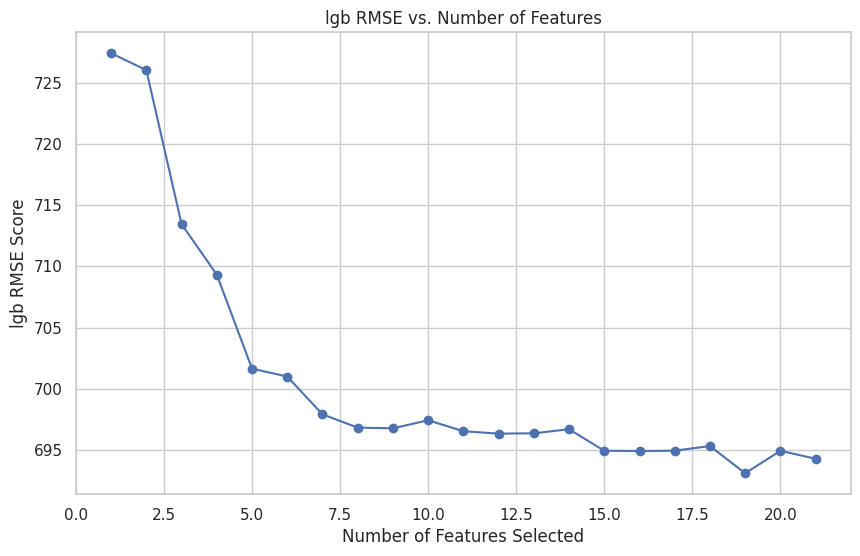

Selected Features for et: 1
Selected Features for et: Index(['Dividends'], dtype='object')
et RMSE: 711.3927270030366


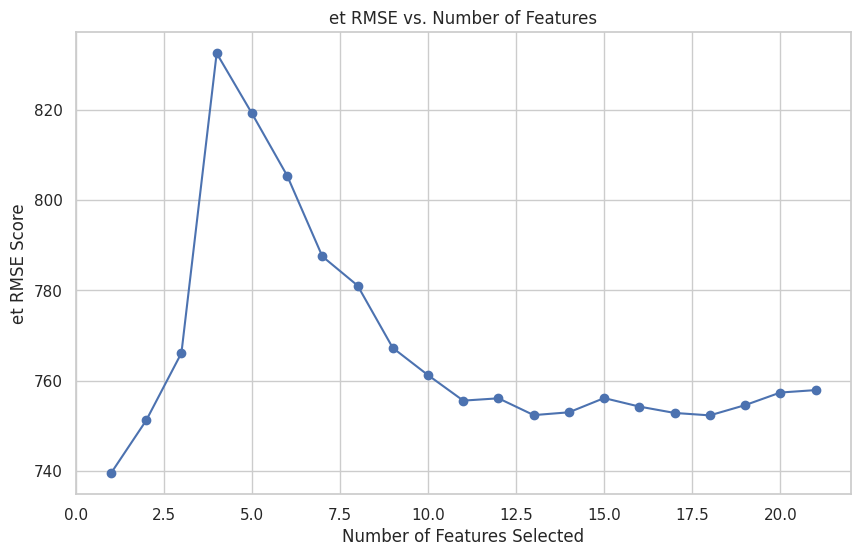

Selected Features for rf: 1
Selected Features for rf: Index(['Age'], dtype='object')
rf RMSE: 696.0837237004434


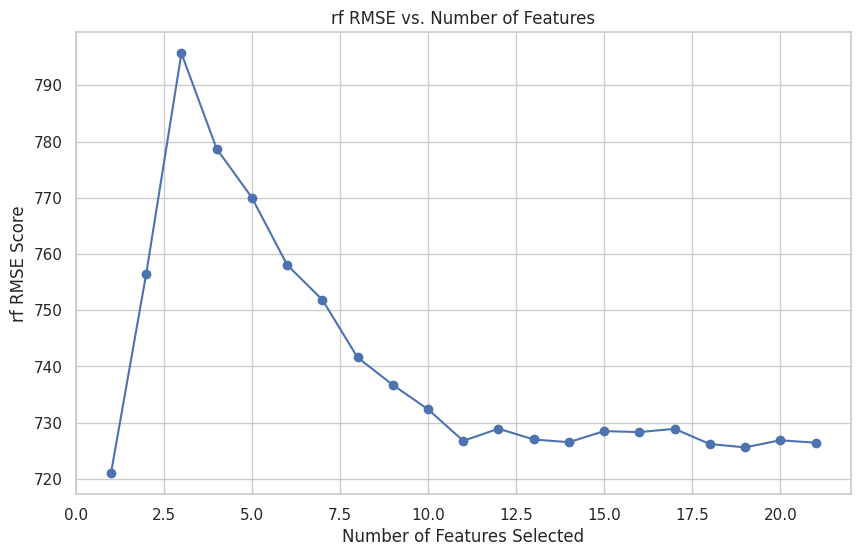

Learning rate set to 0.057475
0:	learn: 730.5794154	total: 2.92ms	remaining: 2.92s
1:	learn: 728.6222887	total: 5.62ms	remaining: 2.8s
2:	learn: 726.3063525	total: 8.61ms	remaining: 2.86s
3:	learn: 724.2919578	total: 11.4ms	remaining: 2.84s
4:	learn: 722.7398156	total: 14ms	remaining: 2.79s
5:	learn: 720.9333481	total: 16.9ms	remaining: 2.81s
6:	learn: 719.2605234	total: 19.5ms	remaining: 2.77s
7:	learn: 718.1104073	total: 22.4ms	remaining: 2.78s
8:	learn: 716.9373628	total: 25.4ms	remaining: 2.79s
9:	learn: 716.1043715	total: 28.1ms	remaining: 2.78s
10:	learn: 715.1418332	total: 30.6ms	remaining: 2.75s
11:	learn: 714.0268624	total: 33.6ms	remaining: 2.76s
12:	learn: 712.7849614	total: 36.3ms	remaining: 2.76s
13:	learn: 712.0009558	total: 39.2ms	remaining: 2.76s
14:	learn: 710.8545986	total: 42ms	remaining: 2.76s
15:	learn: 709.5239063	total: 45.2ms	remaining: 2.78s
16:	learn: 708.5854882	total: 48.1ms	remaining: 2.78s
17:	learn: 707.8973342	total: 51ms	remaining: 2.78s
18:	learn: 706.

ValueError: when `importance_getter=='auto'`, the underlying estimator VotingRegressor should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [192]:
for name, estimator in voting_regressor.estimators:
    perform_rfecv(estimator, X_train, y_train, X_test, y_test, name)

# You can also perform RFECV on the combined VotingRegressor
perform_rfecv(voting_regressor, X_train, y_train, X_test, y_test, 'VotingRegressor')

In [193]:
voting_regressor = VotingRegressor([
    ('xgb', xgb_model),
    ('catboost', cat_model),
    ('lgb', lgb_model),
    ('et', et_model),
    ('rf', rf_model)
])

# Iterate over individual models within VotingRegressor
for name, estimator in voting_regressor.named_estimators_.items():
    print(f"Performing RFECV for {name}")

    # Create RFECV object for each individual model
    rfecv = RFECV(estimator=estimator, step=1, cv=kf, scoring='neg_mean_squared_error')

    # Fit RFECV on the training data
    rfecv.fit(X_train, y_train)

    # Get the selected features
    selected_features = X_train.columns[rfecv.support_]

    # Print the selected features
    print(f"Selected Features for {name}:", selected_features)

    # Transform the training and testing sets using only the selected features
    X_train_selected = rfecv.transform(X_train)
    X_test_selected = rfecv.transform(X_test)

    # Now, you can train your model using the selected features
    estimator.fit(X_train_selected, y_train)
    predictions = estimator.predict(X_test_selected)

    # Evaluate the model using RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"{name} RMSE:", rmse)

    # Plot the number of selected features vs. cross-validated RMSE score
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), np.sqrt(-rfecv.cv_results_['mean_test_score']), marker='o', linestyle='-', color='b')
    plt.title(f'{name} RMSE vs. Number of Features')
    plt.xlabel('Number of Features Selected')
    plt.ylabel(f'{name} RMSE Score')
    plt.grid(True)
    plt.show()

AttributeError: 'VotingRegressor' object has no attribute 'named_estimators_'

In [177]:
train[train['Gains']==99999].describe()

Age  Working_Week (Yearly)    Gains  Losses    Dividends  \
count  30.000000              30.000000     30.0    30.0     30.00000   
mean   42.133333              49.466667  99999.0     0.0   1562.70000   
std     9.902049               9.912491      0.0     0.0   4818.58351   
min    23.000000               0.000000  99999.0     0.0      0.00000   
25%    35.250000              52.000000  99999.0     0.0      0.00000   
50%    43.000000              52.000000  99999.0     0.0      0.00000   
75%    48.000000              52.000000  99999.0     0.0    385.25000   
max    64.000000              52.000000  99999.0     0.0  24000.00000   

            Income  
count    30.000000  
mean    372.700000  
std     680.250266  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%     375.000000  
max    2350.000000

In [172]:
train[train['Gains']>=90000]

Age Gender              Education_Status         Employment_Status  \
45      41      M                       College                 Full-Time   
243     53      M              Bachelors degree  Children or Armed Forces   
485     33      F                       College                 Full-Time   
1236    44      M              Doctorate degree                 Full-Time   
1293    47      M                Masters degree                 Full-Time   
1338    24      M                       College  Children or Armed Forces   
1720    32      M              Bachelors degree  Children or Armed Forces   
2009    48      M                 High Freshman                 Full-Time   
2677    35      M           Professional degree  Children or Armed Forces   
3525    50      M                       College  Children or Armed Forces   
4008    44      M              Bachelors degree                 Full-Time   
4199    59      F              Bachelors degree  Children or Armed Forces   
6962    52      F                       College                 Full-Time   
7295    38      M           Professional degree          Choice Part-Time   
8503    46      M              Bachelors degree  Children or Armed Forces   
9134    33      M  Associates degree (Academic)                 Full-Time   
9509    45      M              Doctorate degree  Children or Armed Forces   
10312   36      M              Bachelors degree                 Full-Time   
10817   42      F              Bachelors degree  Children or Armed Forces   
10842   44      M           Professional degree  Children or Armed Forces   
11008   36      M           Professional degree                 Full-Time   
11093   41      M                Masters degree  Children or Armed Forces   
12792   39      M              Doctorate degree  Children or Armed Forces   
13822   52      M                       College                 Full-Time   
14365   64      M           Professional degree  Children or Armed Forces   
14903   30      M              Bachelors degree  Children or Armed Forces   
15088   48      M              Elementary (5-6)                 Full-Time   
15127   30      F                 High graduate  Children or Armed Forces   
16463   23      F                 High graduate  Children or Armed Forces   
18036   55      M                High Sophomore  Children or Armed Forces   

       Working_Week (Yearly)                  Industry_Status  \
45                        52            Public Administration   
243                       52          Manufacturing (Durable)   
485                       52                           Retail   
1236                      52                        Hospitals   
1293                      52  Finance Insurance & Real Estate   
1338                      52      Not in universe or children   
1720                      52                        Hospitals   
2009                      52                        Education   
2677                      52                        Hospitals   
3525                      52                        Wholesale   
4008                      52  Finance Insurance & Real Estate   
4199                       0      Not in universe or children   
6962                      45                   Transportation   
7295                      52       Medical (except Hospitals)   
8503                      52  Finance Insurance & Real Estate   
9134                      52                           Retail   
9509                      52       Medical (except Hospitals)   
10312                     52                        Wholesale   
10817                     52                   Transportation   
10842                     52  Finance Insurance & Real Estate   
11008                     52       Medical (except Hospitals)   
11093                     52  Finance Insurance & Real Estate   
12792                     52       Medical (except Hospitals)   
13822                     52          Manufacturing (Durabl

In [185]:
train['Gains'].describe()

count    20000.000000
mean       383.129500
std       4144.247487
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Gains, dtype: float64

In [178]:
def rmse_scorer(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# Random Forest
rf_model = RandomForestRegressor(random_state=43)
rf_model.fit(X_train.drop(['Gains'],axis=1), y_train)
rf_predictions = rf_model.predict(X_test.drop(['Gains'],axis=1))
rf_scores = cross_val_score(rf_model, X_train.drop(['Gains'],axis=1), y_train, cv=kf, scoring=make_scorer(rmse_scorer))
rf_rmse = rmse_scorer(y_test, rf_predictions)


# Extra Trees
et_model = ExtraTreesRegressor(random_state=43)
et_model.fit(X_train.drop(['Gains'],axis=1), y_train)
et_predictions = et_model.predict(X_test.drop(['Gains'],axis=1))
et_scores = cross_val_score(et_model, X_train.drop(['Gains'],axis=1), y_train, cv=kf, scoring=make_scorer(rmse_scorer))
et_rmse = rmse_scorer(y_test, et_predictions)

#xgb
xgb_model = xgb.XGBRegressor(random_state=43)
xgb_model.fit(X_train.drop(['Gains'],axis=1), y_train)
xgb_predictions = xgb_model.predict(X_test.drop(['Gains'],axis=1))
xgb_scores = cross_val_score(xgb_model, X_train.drop(['Gains'],axis=1), y_train, cv=kf, scoring=make_scorer(rmse_scorer))
xgb_rmse = rmse_scorer(y_test, xgb_predictions)

#cat
cat_model = CatBoostRegressor(random_seed=43)
cat_model.fit(X_train.drop(['Gains'],axis=1), y_train)
cat_predictions = cat_model.predict(X_test.drop(['Gains'],axis=1))
cat_scores = cross_val_score(cat_model, X_train.drop(['Gains'],axis=1), y_train, cv=kf, scoring=make_scorer(rmse_scorer))
cat_rmse = rmse_scorer(y_test, cat_predictions)

#lgb
lgb_model = LGBMRegressor(random_state=43)
lgb_model.fit(X_train.drop(['Gains'],axis=1), y_train)
lgb_predictions = lgb_model.predict(X_test.drop(['Gains'],axis=1))
lgb_scores = cross_val_score(lgb_model, X_train.drop(['Gains'],axis=1), y_train, cv=kf, scoring=make_scorer(rmse_scorer))
lgb_rmse = rmse_scorer(y_test, lgb_predictions)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
46:	learn: 689.5889058	total: 146ms	remaining: 2.96s
47:	learn: 688.8794628	total: 149ms	remaining: 2.95s
48:	learn: 688.3342354	total: 152ms	remaining: 2.94s
49:	learn: 688.0246366	total: 155ms	remaining: 2.94s
50:	learn: 687.4475781	total: 157ms	remaining: 2.93s
51:	learn: 687.1157499	total: 161ms	remaining: 2.93s
52:	learn: 686.7980111	total: 164ms	remaining: 2.93s
53:	learn: 686.3579662	total: 167ms	remaining: 2.92s
54:	learn: 685.9381866	total: 169ms	remaining: 2.91s
55:	learn: 685.5666855	total: 172ms	remaining: 2.89s
56:	learn: 685.2969635	total: 174ms	remaining: 2.88s
57:	learn: 684.8966373	total: 177ms	remaining: 2.87s
58:	learn: 684.4088013	total: 180ms	remaining: 2.87s
59:	learn: 683.8938422	total: 183ms	remaining: 2.86s
60:	learn: 683.5406168	total: 188ms	remaining: 2.89s
61:	learn: 683.1973873	total: 193ms	remaining: 2.92s
62:	learn: 682.6333254	total: 196ms	remaining: 2.91s
63:	learn: 682.2722837	total: 198ms	remaining: 2.9s
64:	learn: 

In [179]:
print(f'Random Forest Cross-Validation RMSE: {rf_scores.mean()}')
print(f'RF test RMSE: {rf_rmse}\n')
print(f'Extra Trees Cross-Validation RMSE: {et_scores.mean()}')
print(f'ET test RMSE: {et_rmse}\n')
print(f'XGBoost Cross-Validation RMSE: {xgb_scores.mean()}')
print(f'XGBoost test RMSE: {xgb_rmse}\n')
print(f'CatBoost Cross-Validation RMSE: {cat_scores.mean()}')
print(f'CatBoost test RMSE: {cat_rmse}\n')
print(f"Cross-validated LightGBM scores: {lgb_scores.mean()}")
print(f"LightGBM RMSE on test set: {lgb_rmse}")

Random Forest Cross-Validation RMSE: 725.9981526109061
RF test RMSE: 689.9485863765335

Extra Trees Cross-Validation RMSE: 758.269386204715
ET test RMSE: 707.2288701258512

XGBoost Cross-Validation RMSE: 726.1154156093155
XGBoost test RMSE: 702.1966069266921

CatBoost Cross-Validation RMSE: 701.0915122334345
CatBoost test RMSE: 666.7998150461035

Cross-validated LightGBM scores: 692.9494296113647
LightGBM RMSE on test set: 663.3239936900901


In [180]:
from sklearn.ensemble import VotingRegressor
voting_regressor = VotingRegressor([('xgb', xgb_model), ('catboost', cat_model),('lgb',lgb_model),('et',et_model),('rf',rf_model)])
voting_regressor.fit(X_train.drop(['Gains'],axis=1), y_train)#.drop(['device','transaction_revenue','traffic_source'],axis=1)

voting_predictions = voting_regressor.predict(X_test.drop(['Gains'],axis=1))

voting_rmse = rmse_scorer(y_test, voting_predictions)
voting_scores = cross_val_score(voting_regressor, X_train.drop(['Gains'],axis=1), y_train, cv=kf, scoring=make_scorer(rmse_scorer))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
39:	learn: 693.2981721	total: 114ms	remaining: 2.75s
40:	learn: 692.7041065	total: 117ms	remaining: 2.73s
41:	learn: 691.8606802	total: 120ms	remaining: 2.73s
42:	learn: 691.3383536	total: 122ms	remaining: 2.73s
43:	learn: 690.8479561	total: 126ms	remaining: 2.73s
44:	learn: 690.3821378	total: 128ms	remaining: 2.72s
45:	learn: 689.9837781	total: 131ms	remaining: 2.73s
46:	learn: 689.5889058	total: 134ms	remaining: 2.72s
47:	learn: 688.8794628	total: 137ms	remaining: 2.71s
48:	learn: 688.3342354	total: 140ms	remaining: 2.71s
49:	learn: 688.0246366	total: 143ms	remaining: 2.71s
50:	learn: 687.4475781	total: 147ms	remaining: 2.73s
51:	learn: 687.1157499	total: 150ms	remaining: 2.74s
52:	learn: 686.7980111	total: 153ms	remaining: 2.74s
53:	learn: 686.3579662	total: 156ms	remaining: 2.73s
54:	learn: 685.9381866	total: 159ms	remaining: 2.73s
55:	learn: 685.5666855	total: 162ms	remaining: 2.72s
56:	learn: 685.2969635	total: 164ms	remaining: 2.72s
57:	learn:

In [181]:
print(f'VotingRegressor Cross-Validation RMSE: {voting_scores.mean()}')
print(f'VotingRegressor test RMSE: {voting_rmse}')

VotingRegressor Cross-Validation RMSE: 701.4805382337995
VotingRegressor test RMSE: 668.0049167555171
